# Global Power Plant Database

# Problem Statement:
    
Description

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

Key attributes of the database

The database includes the following indicators:

`country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]
`country_long` (text): longer form of the country designation
`name` (text): name or title of the power plant, generally in Romanized form
`gppd_idnr` (text): 10 or 12 character identifier for the power plant
`capacity_mw` (number): electrical generating capacity in megawatts
`latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
`longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
`primary_fuel` (text): energy source used in primary electricity generation or export
`other_fuel1` (text): energy source used in electricity generation or export
`other_fuel2` (text): energy source used in electricity generation or export
`other_fuel3` (text): energy source used in electricity generation or export
 `commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available
`owner` (text): majority shareholder of the power plant, generally in Romanized form
`source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form
`url` (text): web document corresponding to the `source` field
`geolocation_source` (text): attribution for geolocation information
`wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.
`year_of_capacity_data` (number): year the capacity information was reported
`generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013
`generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014
`generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015
`generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016
`generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017
`generation_gwh_2018` (number): electricity generation in gigawatt-hours reported for the year 2018
`generation_gwh_2019` (number): electricity generation in gigawatt-hours reported for the year 2019
`generation_data_source` (text): attribution for the reported generation information
`estimated_generation_gwh_2013` (number): estimated electricity generation in gigawatt-hours for the year 2013
`estimated_generation_gwh_2014` (number): estimated electricity generation in gigawatt-hours for the year 2014 
`estimated_generation_gwh_2015` (number): estimated electricity generation in gigawatt-hours for the year 2015 
`estimated_generation_gwh_2016` (number): estimated electricity generation in gigawatt-hours for the year 2016 
`estimated_generation_gwh_2017` (number): estimated electricity generation in gigawatt-hours for the year 2017 
'estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013
`estimated_generation_note_2014` (text): label of the model/method used to estimate generation for the year 2014 
`estimated_generation_note_2015` (text): label of the model/method used to estimate generation for the year 2015
`estimated_generation_note_2016` (text): label of the model/method used to estimate generation for the year 2016
`estimated_generation_note_2017` (text): label of the model/method used to estimate generation for the year 2017 
    

Fuel Type Aggregation

We define the "Fuel Type" attribute of our database based on common fuel categories. 

Prediction :  

    Make two prediction  1) Primary Fuel    2) capacity_mw 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
powrDF = pd.read_csv('Global Power Plant.csv')
powrDF

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,WRI,NaN,2018.0,NaN,NaN,0.994875,233.596650,865.400000,Central Electricity Authority,NaN
904,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
powrDF.shape

(908, 25)

# Feature column data type indicates that feature data are a mix of continuous and categorical data ,while target / label (' Primary Fuel ') data type indicates that dependent variable data is categorical in nature and target / label 'capacity_mw' data type indicates that dependent variable data is continuous in nature.

In [4]:
powrDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   908 non-null    object 
 1   country_long              908 non-null    object 
 2   name                      908 non-null    object 
 3   gppd_idnr                 908 non-null    object 
 4   capacity_mw               908 non-null    float64
 5   latitude                  862 non-null    float64
 6   longitude                 862 non-null    float64
 7   primary_fuel              908 non-null    object 
 8   other_fuel1               199 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        528 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    908 non-null    object 
 14  url       

Null values are present

# Checking for unique elements

In [5]:
powrDF.nunique()

country                       1
country_long                  1
name                        908
gppd_idnr                   908
capacity_mw                 365
latitude                    837
longitude                   828
primary_fuel                  8
other_fuel1                   3
other_fuel2                   1
other_fuel3                   0
commissioning_year           73
owner                       280
source                      191
url                         304
geolocation_source            3
wepp_id                       0
year_of_capacity_data         1
generation_gwh_2013         364
generation_gwh_2014         374
generation_gwh_2015         398
generation_gwh_2016         405
generation_gwh_2017         410
generation_data_source        1
estimated_generation_gwh      0
dtype: int64

# Checking for Null values

In [6]:
powrDF.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

other_fuel2,other_fuel3,wepp_id,estimated_generation_gwh have no data available, so it is better to drop.

# Statistical Summary

In [7]:
powrDF.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

Categorical Column = country,country_long,name,gppd_idnr,primary_fuel,other_fuel1,other_fuel2,owner,source,url,geolocation_source,generation_data_source.

Continuous Columns = capacity_mw,latitude,longitude,other_fuel3,commissioning_year,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,estimated_generation_gwh.      
         

In [8]:
powrDF.describe()

,capacity_mw,latitude,longitude,other_fuel3,commissioning_year,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,estimated_generation_gwh
count,908.000000,862.000000,862.000000,0.0,528.000000,0.0,520.0,384.000000,401.000000,425.000000,437.000000,443.000000,0.0
mean,321.046378,21.196189,77.447848,NaN,1996.876894,NaN,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,NaN
std,580.221767,6.248627,4.907260,NaN,17.047817,NaN,0.0,3794.767492,4013.558173,4183.203199,4152.038216,4187.236364,NaN
min,0.000000,8.168900,68.644700,NaN,1927.000000,NaN,2018.0,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,16.837500,16.771575,74.258975,NaN,1988.000000,NaN,2018.0,244.458088,223.650436,174.174750,187.193669,177.643170,NaN
50%,60.000000,21.778300,76.719250,NaN,2000.000000,NaN,2018.0,797.063475,805.760000,701.027250,716.728350,807.601700,NaN
75%,388.125000,25.516375,79.441475,NaN,2011.250000,NaN,2018.0,2795.021500,3034.575000,3080.000000,3263.483000,3258.785000,NaN
max,4760.000000,34.649000,95.408000,NaN,2018.000000,NaN,2018.0,27586.200000,28127.000000,30539.000000,30015.000000,35116.000000,NaN


From the above description it is observed that columns like capacity_mw, generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017 may contain outliers since there is a huge difference between 75% and max and their respective means and 50% also are significantly different.

A higher Std than mean in above columns indicates skewness.

In [9]:
powrDF.latitude.isnull().sum()/908*100

5.066079295154185

In [10]:

powrDF.longitude.isnull().sum()/908*100

5.066079295154185

In [11]:
powrDF.generation_data_source.isnull().sum()/908*100

50.440528634361236

In [12]:
powrDF.geolocation_source.isnull().sum()/908*100

2.092511013215859

In [13]:
powrDF.other_fuel1.isnull().sum()/908*100

78.08370044052863

In [14]:
powrDF.other_fuel2.isnull().sum()/908*100

99.8898678414097

In [15]:
powrDF.other_fuel3.isnull().sum()/908*100

100.0

In [16]:
powrDF.commissioning_year.isnull().sum()/908*100

41.85022026431718

In [17]:
powrDF.owner.isnull().sum()/908*100

62.33480176211453

In [18]:
powrDF.wepp_id.isnull().sum()/908*100

100.0

In [19]:
powrDF.estimated_generation_gwh.isnull().sum()/908*100

100.0

In [20]:
powrDF.year_of_capacity_data.isnull().sum()/908*100

42.731277533039645

In [21]:
powrDF.generation_gwh_2013.isnull().sum()/908*100

57.70925110132159

In [22]:
powrDF.generation_gwh_2014.isnull().sum()/908*100

55.837004405286336

In [23]:
powrDF.generation_gwh_2015.isnull().sum()/908*100

53.19383259911894

In [24]:
powrDF.generation_gwh_2016.isnull().sum()/908*100

51.87224669603524

In [25]:
powrDF.generation_gwh_2017.isnull().sum()/908*100

51.2114537444934

# dropping columns estimated_generation_gwh,wepp_id,owner,other_fuel3,other_fuel2,other_fuel1 since they contain insufficient amount of data.

In [26]:
powrDF.drop(columns=['estimated_generation_gwh','wepp_id','owner','other_fuel3','other_fuel2','other_fuel1'],inplace=True)

In [27]:
powrDF

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,2011.0,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,2004.0,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,2015.0,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,2016.0,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,NaN,NaN,0.994875,233.596650,865.400000,Central Electricity Authority
904,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# dropping columns url,country,country_long ,name, gppd_idnr since they don't contribute to building a good model for predicting the target variable values.

In [28]:
powrDF.drop(columns=['country','country_long','name','gppd_idnr','url'],inplace=True)

In [29]:
powrDF

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
0,2.5,28.1839,73.2407,Solar,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,98.0,24.7663,74.6090,Coal,NaN,Ultratech Cement ltd,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,Wind,NaN,CDM,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,Gas,2004.0,Central Electricity Authority,WRI,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority
4,1800.0,21.9603,82.4091,Coal,2015.0,Central Electricity Authority,WRI,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,1600.0,16.2949,77.3568,Coal,2016.0,Central Electricity Authority,WRI,2018.0,NaN,NaN,0.994875,233.596650,865.400000,Central Electricity Authority
904,3.0,12.8932,78.1654,Solar,NaN,Karnataka Power Corporation Limited,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,25.5,15.2758,75.5811,Wind,NaN,CDM,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,80.0,24.3500,73.7477,Coal,NaN,Hindustan Zinc ltd,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:

powrDF.dtypes[powrDF.dtypes == 'object'] #Identifying the Categorical Columns

primary_fuel              object
source                    object
geolocation_source        object
generation_data_source    object
dtype: object

In [31]:
powrDF.source.value_counts()

Central Electricity Authority                520
CDM                                          124
Lancosola                                     10
National Renewable Energy Laboratory           8
National Thermal Power Corporation (NTPC)      6
                                            ... 
Core Fuels ltd                                 1
Astonfield Management Limited                  1
Se Pvt Rsolar                                  1
Sunflag Co ltd                                 1
Gem Sugars ltd                                 1
Name: source, Length: 191, dtype: int64

In [32]:
powrDF.generation_data_source.value_counts()

Central Electricity Authority    450
Name: generation_data_source, dtype: int64

In [33]:
powrDF.geolocation_source.value_counts()

WRI                                     766
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64

dropping columns generation_data_source and source since they don't contribute to building a good model for predicting the target variable values.

In [34]:
powrDF.drop(columns=['generation_data_source','source'],inplace=True)

In [35]:
powrDF

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,2.5,28.1839,73.2407,Solar,2011.0,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN
1,98.0,24.7663,74.6090,Coal,NaN,WRI,NaN,NaN,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,Wind,NaN,WRI,NaN,NaN,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,Gas,2004.0,WRI,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500
4,1800.0,21.9603,82.4091,Coal,2015.0,WRI,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736
...,...,...,...,...,...,...,...,...,...,...,...,...
903,1600.0,16.2949,77.3568,Coal,2016.0,WRI,2018.0,NaN,NaN,0.994875,233.596650,865.400000
904,3.0,12.8932,78.1654,Solar,NaN,Industry About,NaN,NaN,NaN,NaN,NaN,NaN
905,25.5,15.2758,75.5811,Wind,NaN,WRI,NaN,NaN,NaN,NaN,NaN,NaN
906,80.0,24.3500,73.7477,Coal,NaN,WRI,NaN,NaN,NaN,NaN,NaN,NaN


# Checking for unique categories in the categorical columns with null values

In [36]:

powrDF.dtypes[powrDF.dtypes == 'object'] #Identifying the Categorical Columns

primary_fuel          object
geolocation_source    object
dtype: object

In [37]:
powrDF.geolocation_source.isnull().sum()

19

In [38]:
powrDF.geolocation_source.unique()

array(['National Renewable Energy Laboratory', 'WRI', nan,
       'Industry About'], dtype=object)

<AxesSubplot:xlabel='geolocation_source', ylabel='count'>

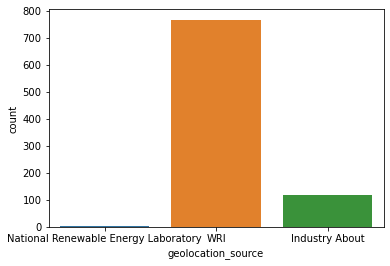

In [39]:
sns.countplot(powrDF.geolocation_source)

In [40]:
powrDF.geolocation_source.isnull().sum()/908*100

2.092511013215859

In [41]:
powrDF.geolocation_source.mode() # most frequently occuring value.

0    WRI
dtype: object

In [42]:
(powrDF['geolocation_source'] == 'WRI').sum()/powrDF.geolocation_source.count()*100 #checking the % share of most frequently occuring value.

86.16422947131609

86.16% of geolocation_source data is 'WRI'.

# Therefore imputing ' WRI' to NaN values in geolocation_source column

In [43]:
from sklearn.impute import SimpleImputer

In [44]:
si = SimpleImputer(missing_values = np.nan,strategy = 'most_frequent',verbose = 0 )

In [45]:
si = si.fit(powrDF[['geolocation_source']])

In [46]:
powrDF[['geolocation_source']] = si.transform(powrDF[['geolocation_source']])

In [47]:
powrDF[['geolocation_source']].isnull().sum()

geolocation_source    0
dtype: int64

There are no more null values in 'geolocation_source' column.

Checking for Null values in continuous / discrete columns.

In [48]:
powrDF.select_dtypes(exclude = object).isnull().sum()

capacity_mw                0
latitude                  46
longitude                 46
commissioning_year       380
year_of_capacity_data    388
generation_gwh_2013      524
generation_gwh_2014      507
generation_gwh_2015      483
generation_gwh_2016      471
generation_gwh_2017      465
dtype: int64

In [49]:
powrDF.latitude

0      28.1839
1      24.7663
2      21.9038
3      23.8712
4      21.9603
        ...   
903    16.2949
904    12.8932
905    15.2758
906    24.3500
907     9.9344
Name: latitude, Length: 908, dtype: float64

In [50]:
powrDF.longitude

0      73.2407
1      74.6090
2      69.3732
3      91.3602
4      82.4091
        ...   
903    77.3568
904    78.1654
905    75.5811
906    73.7477
907    77.4768
Name: longitude, Length: 908, dtype: float64

# Using KNN Imputation technique for imputing missing data.

In [51]:
from sklearn.impute import KNNImputer

In [52]:
imp = KNNImputer(n_neighbors=2)

In [53]:
powrDF[['latitude','longitude']] = imp.fit_transform(powrDF[['latitude','longitude']])

In [54]:
powrDF[['latitude','longitude']].isnull().sum()

latitude     0
longitude    0
dtype: int64

# There are no more values missing from 'latitude' and 'longitude' columns.

In [55]:
powrDF.commissioning_year.isnull().sum()/908*100

41.85022026431718

41.85% of commissioning_year is NaN

In [56]:
powrDF.commissioning_year.mode()

0    2013.0
dtype: float64

In [57]:
powrDF.commissioning_year.mode()

0    2013.0
dtype: float64

In [58]:
(powrDF['commissioning_year'] == 2013.0).sum()/powrDF.commissioning_year.count()*100 #checking the % share of most frequently occuring value.

5.303030303030303

In [59]:
powrDF.commissioning_year.mean()

1996.876893939394

In [60]:
powrDF.commissioning_year.median()

2000.0

In [61]:
(powrDF['commissioning_year'] == 1996.0).sum()/powrDF.commissioning_year.count()*100 #checking the % share of mean year value.

2.462121212121212

In [62]:
from sklearn.impute import SimpleImputer
si = SimpleImputer(missing_values = np.nan,strategy = 'median',verbose = 0 )
si = si.fit(powrDF[['commissioning_year']])
powrDF[['commissioning_year']] = si.transform(powrDF[['commissioning_year']])
powrDF[['commissioning_year']].isnull().sum()

commissioning_year    0
dtype: int64

In [63]:
powrDF.commissioning_year = powrDF.commissioning_year.astype('int64') #converting to int data type.

In [64]:
powrDF.commissioning_year

0      2011
1      2000
2      2000
3      2004
4      2015
       ... 
903    2016
904    2000
905    2000
906    2000
907    2000
Name: commissioning_year, Length: 908, dtype: int64

In [65]:
powrDF.year_of_capacity_data.value_counts()

2018.0    520
Name: year_of_capacity_data, dtype: int64

# Dropping column year_of_capacity_data as all the values in it are '2018.0'

In [66]:
powrDF.drop(columns = 'year_of_capacity_data',inplace = True)

In [67]:
powrDF.shape

(908, 11)

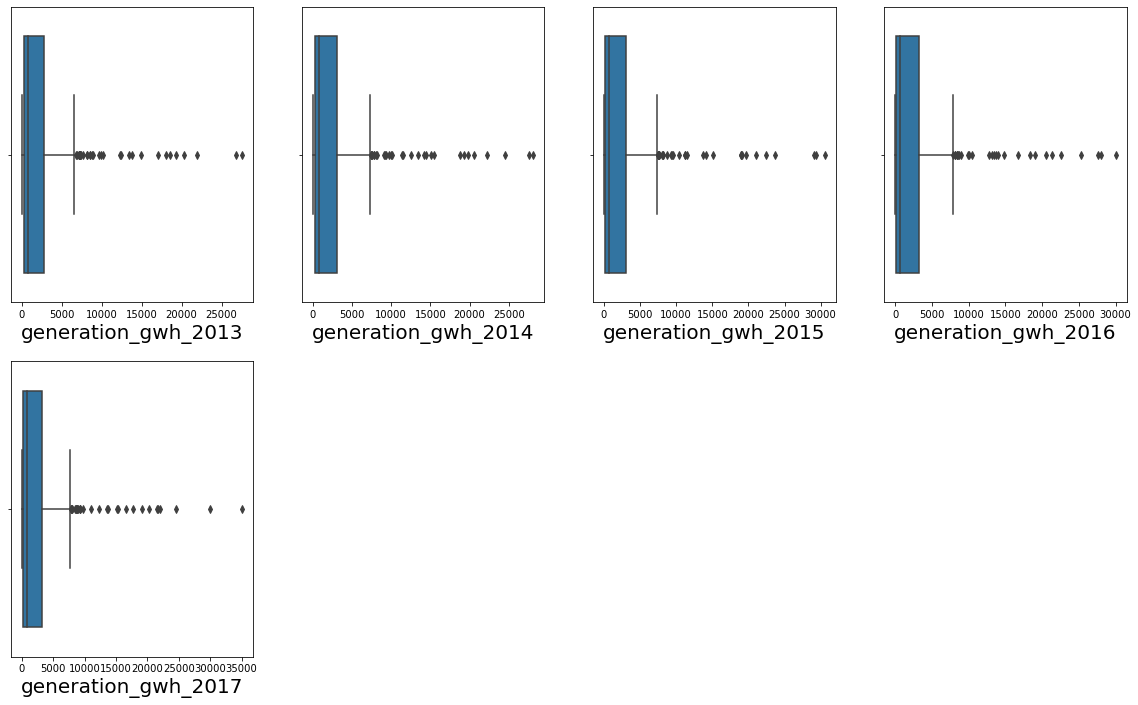

In [68]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
X = powrDF.drop(columns=['capacity_mw','primary_fuel','geolocation_source','latitude','longitude','commissioning_year',])
for col in X:
    if plotnum<=16:
        plt.subplot(4,4,plotnum)
        sns.boxplot(X[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

outliers exist, therefore imputing with KNN imputation technique.

In [69]:
from sklearn.impute import SimpleImputer
si = SimpleImputer(missing_values = np.nan,strategy = 'median',verbose = 0 )
si = si.fit(powrDF[['generation_gwh_2013']])
powrDF[['generation_gwh_2013']] = si.transform(powrDF[['generation_gwh_2013']])
powrDF[['generation_gwh_2013']].isnull().sum()

generation_gwh_2013    0
dtype: int64

In [70]:
from sklearn.impute import SimpleImputer
si = SimpleImputer(missing_values = np.nan,strategy = 'median',verbose = 0 )
si = si.fit(powrDF[['generation_gwh_2014']])
powrDF[['generation_gwh_2014']] = si.transform(powrDF[['generation_gwh_2014']])
powrDF[['generation_gwh_2014']].isnull().sum()

generation_gwh_2014    0
dtype: int64

In [71]:
from sklearn.impute import SimpleImputer
si = SimpleImputer(missing_values = np.nan,strategy = 'median',verbose = 0 )
si = si.fit(powrDF[['generation_gwh_2015']])
powrDF[['generation_gwh_2015']] = si.transform(powrDF[['generation_gwh_2015']])
powrDF[['generation_gwh_2015']].isnull().sum()

generation_gwh_2015    0
dtype: int64

In [72]:
from sklearn.impute import SimpleImputer
si = SimpleImputer(missing_values = np.nan,strategy = 'median',verbose = 0 )
si = si.fit(powrDF[['generation_gwh_2016']])
powrDF[['generation_gwh_2016']] = si.transform(powrDF[['generation_gwh_2016']])
powrDF[['generation_gwh_2016']].isnull().sum()

generation_gwh_2016    0
dtype: int64

In [73]:
from sklearn.impute import SimpleImputer
si = SimpleImputer(missing_values = np.nan,strategy = 'median',verbose = 0 )
si = si.fit(powrDF[['generation_gwh_2017']])
powrDF[['generation_gwh_2017']] = si.transform(powrDF[['generation_gwh_2017']])
powrDF[['generation_gwh_2017']].isnull().sum()

generation_gwh_2017    0
dtype: int64

In [74]:
powrDF.isnull().sum()

capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
commissioning_year     0
geolocation_source     0
generation_gwh_2013    0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
dtype: int64

# There are no more null values in the dataframe.
Extracting the age of Power plants from commissioning_year column will give a better insight into its relationship with target column data.¶

In [75]:
powrDF['Age'] = powrDF['commissioning_year'].apply(lambda y: 2021 - y)

In [76]:
powrDF.drop(columns=['commissioning_year'],inplace=True)

In [77]:
powrDF

,capacity_mw,latitude,longitude,primary_fuel,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,Age
0,2.5,28.1839,73.2407,Solar,National Renewable Energy Laboratory,797.063475,805.760000,701.027250,716.728350,807.601700,10
1,98.0,24.7663,74.6090,Coal,WRI,797.063475,805.760000,701.027250,716.728350,807.601700,21
2,39.2,21.9038,69.3732,Wind,WRI,797.063475,805.760000,701.027250,716.728350,807.601700,21
3,135.0,23.8712,91.3602,Gas,WRI,631.777928,617.789264,843.747000,886.004428,663.774500,17
4,1800.0,21.9603,82.4091,Coal,WRI,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,6
...,...,...,...,...,...,...,...,...,...,...,...
903,1600.0,16.2949,77.3568,Coal,WRI,797.063475,805.760000,0.994875,233.596650,865.400000,5
904,3.0,12.8932,78.1654,Solar,Industry About,797.063475,805.760000,701.027250,716.728350,807.601700,21
905,25.5,15.2758,75.5811,Wind,WRI,797.063475,805.760000,701.027250,716.728350,807.601700,21
906,80.0,24.3500,73.7477,Coal,WRI,797.063475,805.760000,701.027250,716.728350,807.601700,21


# Analysing the continuous data type Target column

In [78]:
powrDF.capacity_mw

0         2.5
1        98.0
2        39.2
3       135.0
4      1800.0
        ...  
903    1600.0
904       3.0
905      25.5
906      80.0
907      16.5
Name: capacity_mw, Length: 908, dtype: float64

<AxesSubplot:xlabel='capacity_mw', ylabel='Density'>

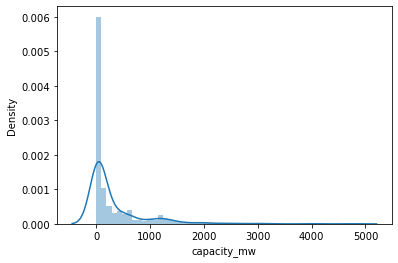

In [79]:
sns.distplot(powrDF.capacity_mw)

In [80]:
powrDF.select_dtypes(include = object).isnull().sum()

primary_fuel          0
geolocation_source    0
dtype: int64

In [81]:
powrDF.capacity_mw.skew()

3.1932573023446458

Distribution of data is right skewed.

# Analysing Feature columns with Continuous Data.

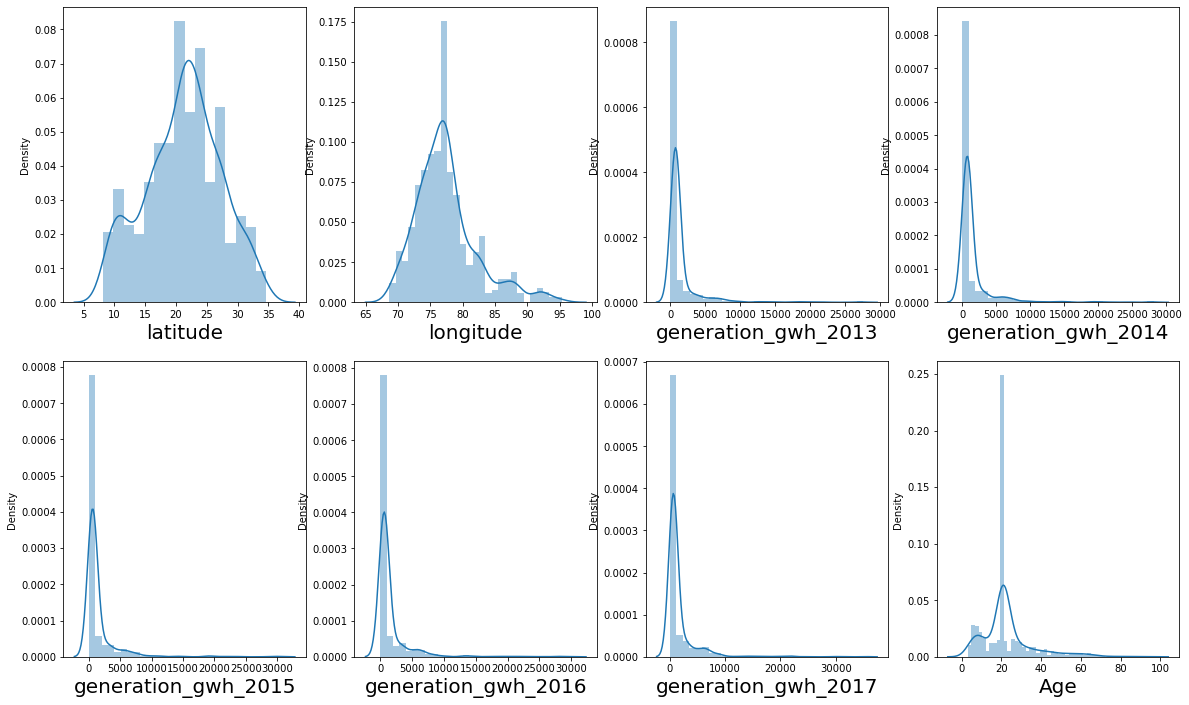

In [82]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
for col in powrDF.drop(columns=['capacity_mw','primary_fuel','geolocation_source']):
    if plotnum<=10:
        plt.subplot(4,4,plotnum)
        sns.distplot(powrDF[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

data distributuions are skewed

# capacity_mw vs continuous / discrete data type columns

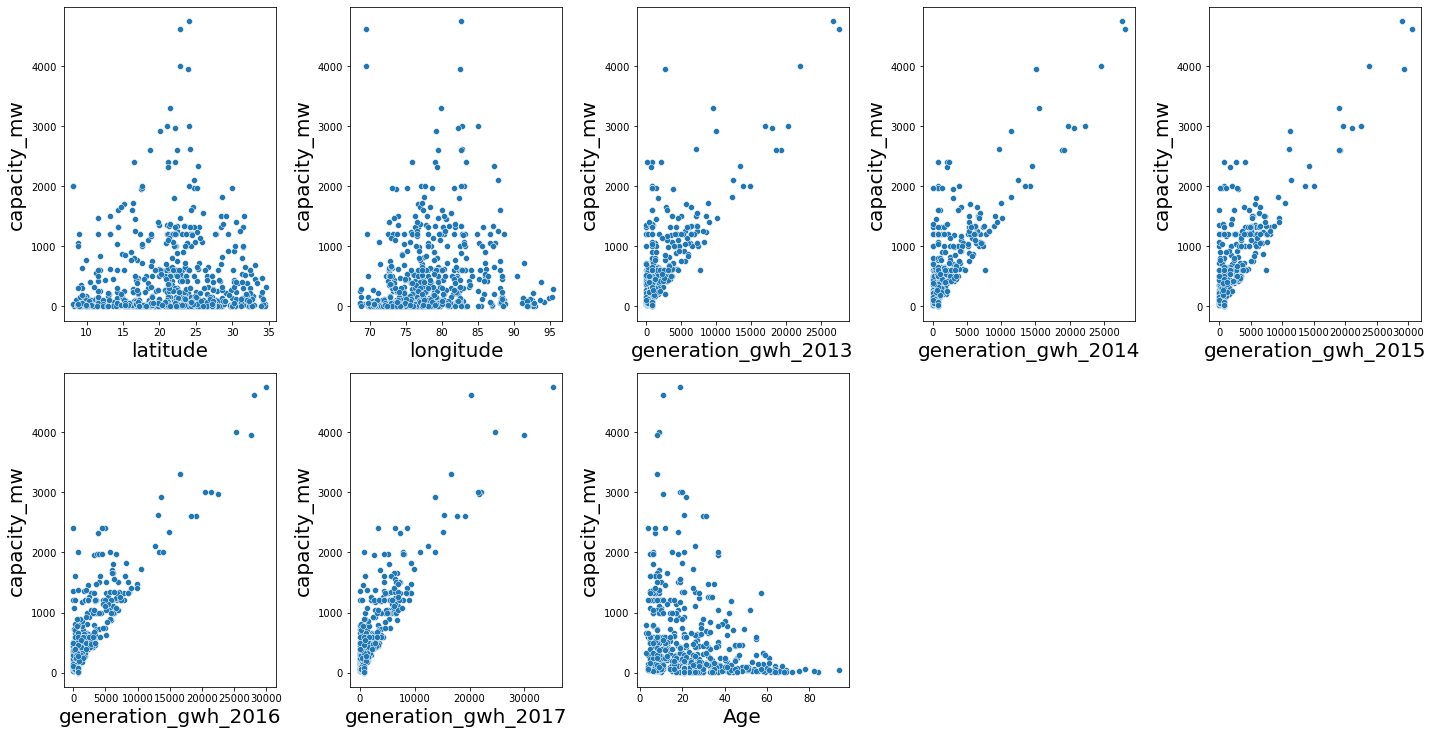

In [83]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
y = powrDF['capacity_mw']
X =  powrDF.drop(columns=['capacity_mw','primary_fuel','geolocation_source'])
for col in X:
    if plotnum<=23:
        plt.subplot(5,5,plotnum)
        sns.scatterplot(X[col],y)
        plt.xlabel(col,fontsize=20)
        plt.ylabel('capacity_mw',fontsize=20)
    plotnum+=1
plt.tight_layout()

We can observe a linear relationship between columns generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017

<Figure size 432x432 with 0 Axes>

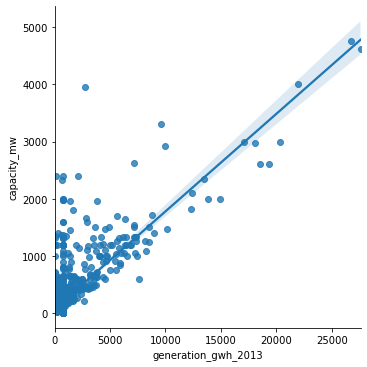

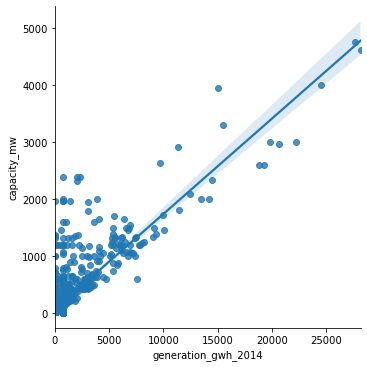

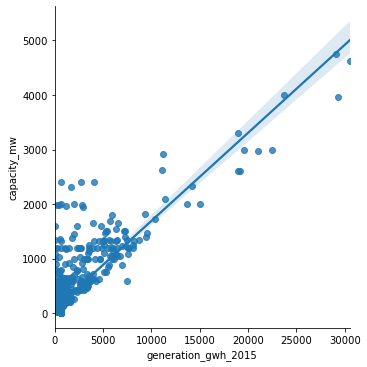

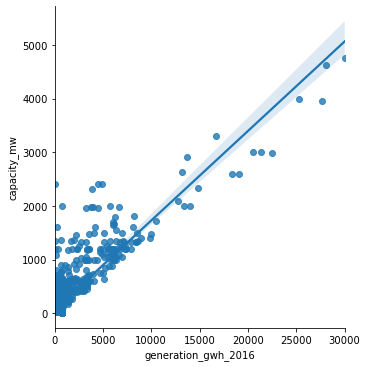

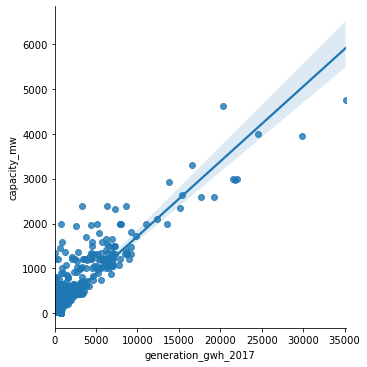

In [84]:
plt.figure(figsize=(6,6),facecolor='white')
X = ['generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017']
for col in X:
    sns.lmplot(x = col,y = 'capacity_mw',data = powrDF)

# capacity_mw vs categorical data type columns

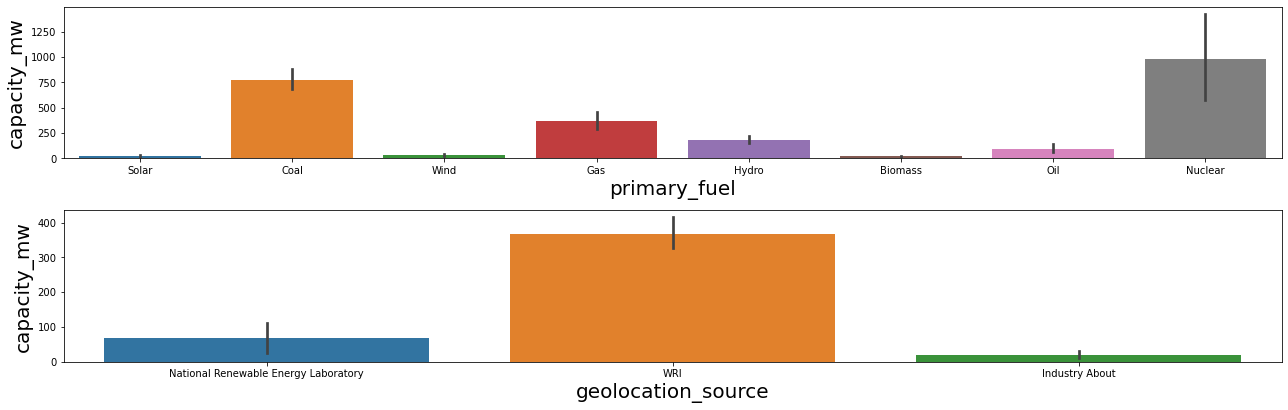

In [85]:
plt.figure(figsize=(18,25),facecolor='white')
plotnum=1
y = powrDF['capacity_mw']
X =  powrDF[['primary_fuel','geolocation_source']]
for col in X:
    if plotnum<=23:
        plt.subplot(9,1,plotnum)
        sns.barplot(X[col],y)
        plt.xlabel(col,fontsize=20)
        plt.ylabel('capacity_mw',fontsize=20)
    plotnum+=1
plt.tight_layout()

from the graphs above it is observed that Nuclear fuel type power plants have the highest capacity followed by coal type.

Most of the data for geolocation source is provided by WRI.

# Analysing the categorical data type Target column

In [86]:
powrDF.primary_fuel.unique()

array(['Solar', 'Coal', 'Wind', 'Gas', 'Hydro', 'Biomass', 'Oil',
       'Nuclear'], dtype=object)

There are 8 unique categories in primary_fuel

<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

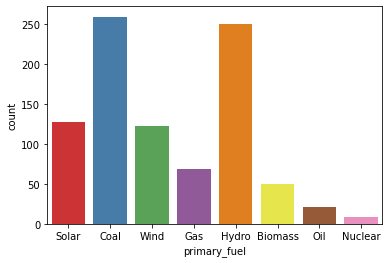

In [87]:
sns.countplot(powrDF['primary_fuel'], palette="Set1")

In [88]:
powrDF.primary_fuel.value_counts()

Coal       259
Hydro      250
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         21
Nuclear      9
Name: primary_fuel, dtype: int64

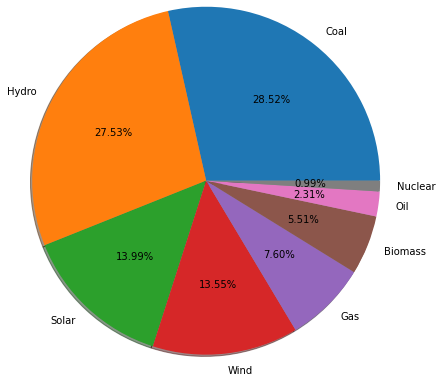

In [89]:
labels = 'Coal','Hydro','Solar','Wind','Gas','Biomass','Oil','Nuclear'
fig, ax = plt.subplots()
ax.pie(powrDF['primary_fuel'].value_counts(),labels = labels,radius =2,autopct = '%1.2f%%', shadow=True,)
plt.show()


Class:
    
'Coal' : Has 28.52% of total values

'Hydro' : Has 27.53% of total values

'Solar' : Has 13.99% of total values

'Wind' : Has 13.55% of total values

'Gas' : Has 7.60% of total values

'Biomass' : Has 5.51% of total values

'Oil' : Has 2.31% of total values

'Nuclear' : Has 0.99% of total values

Classes are imbalanced.

# 'primary_fuel' vs Continuous/Discrete Data Columns

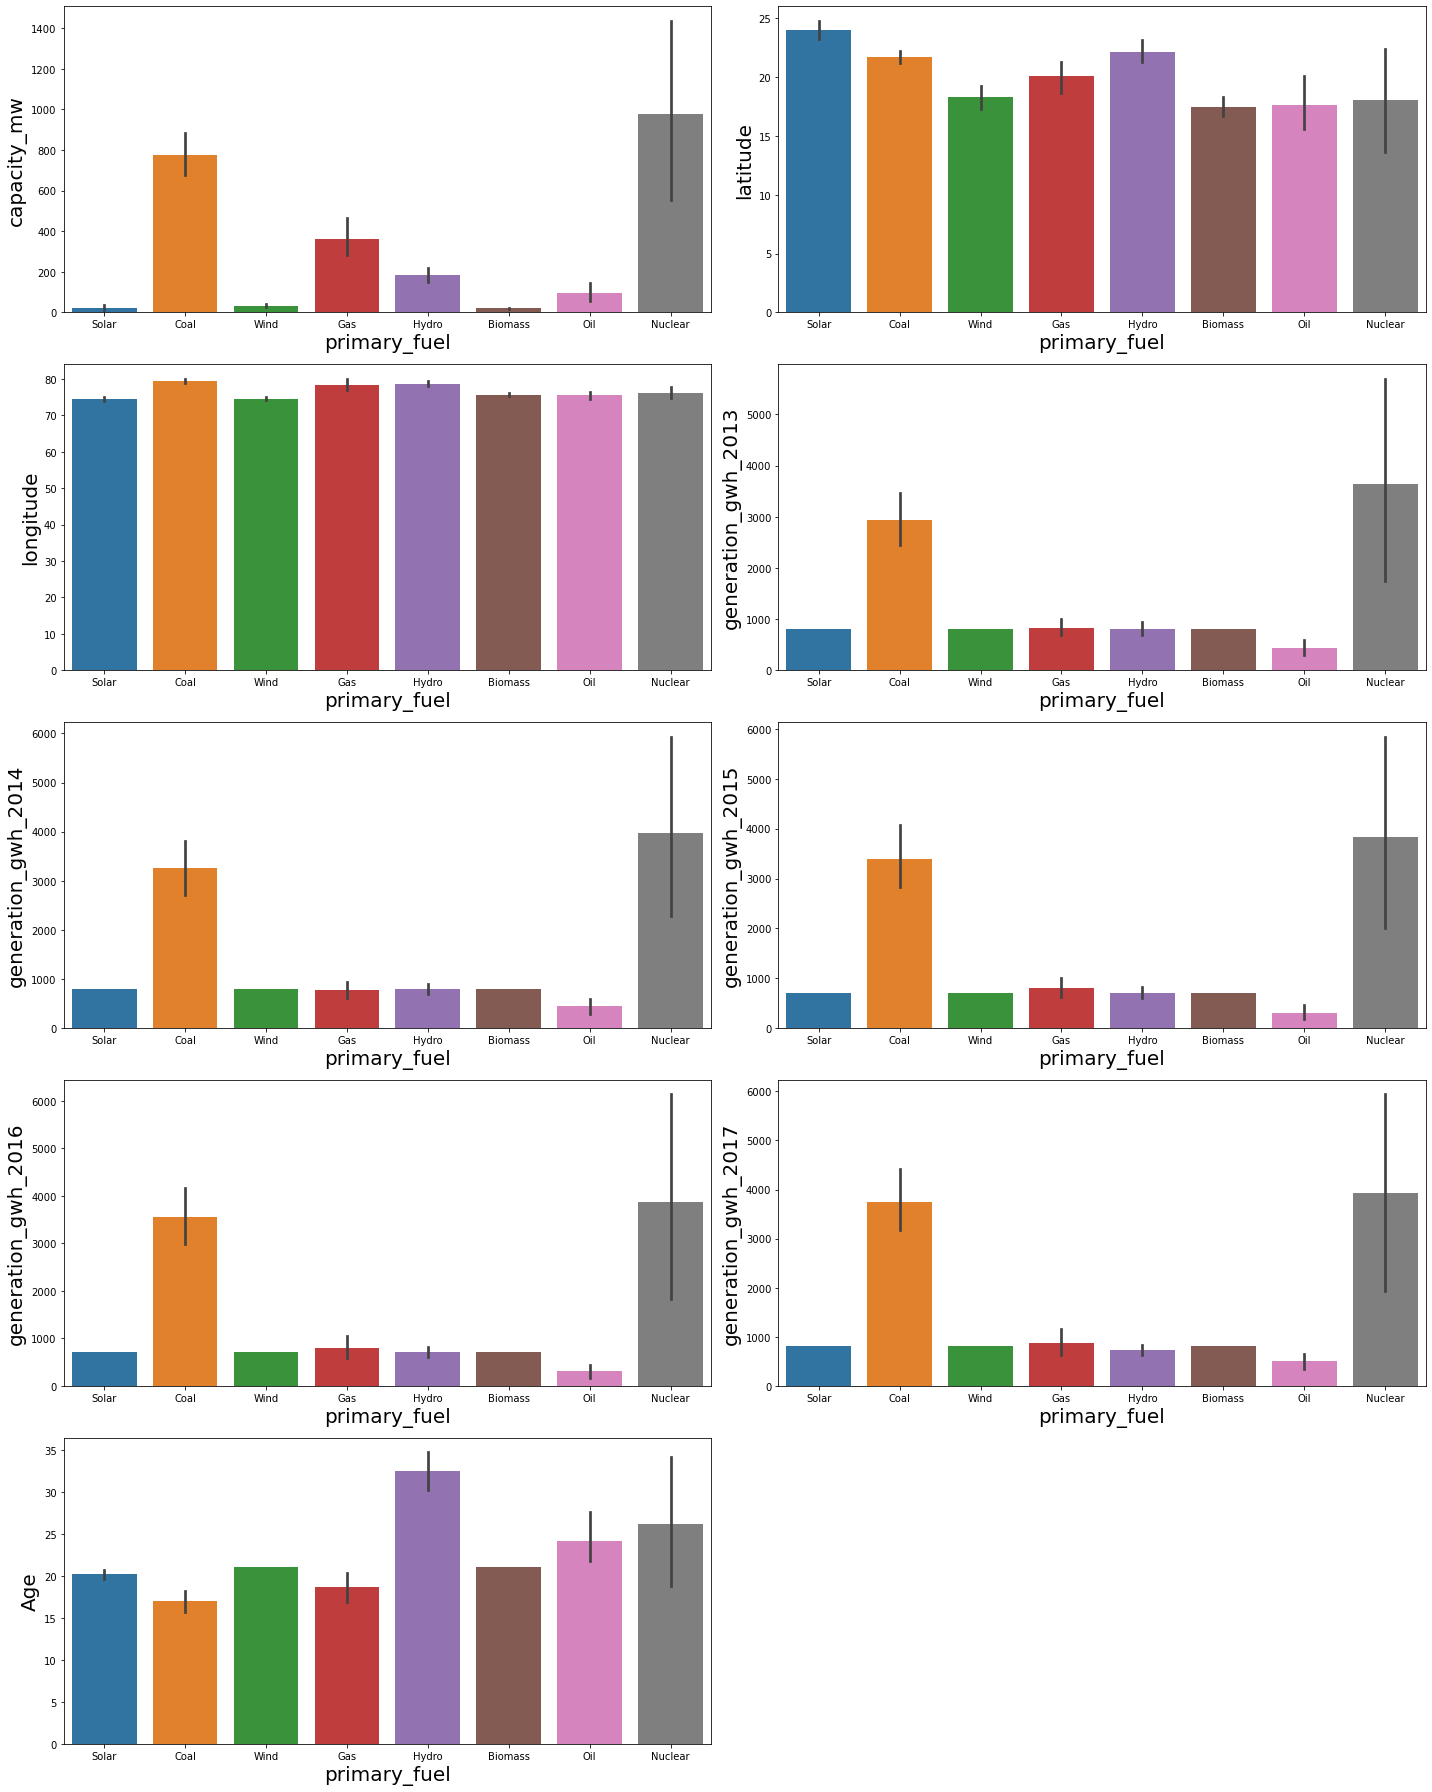

In [90]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
y = powrDF['primary_fuel']
X =  powrDF.drop(columns=['primary_fuel','geolocation_source'])
for col in X:
    if plotnum<=15:
        plt.subplot(5,2,plotnum)
        sns.barplot(y,X[col])
        plt.xlabel('primary_fuel',fontsize=20)
        plt.ylabel(col,fontsize=20)
    plotnum+=1
plt.tight_layout()

Following observations can be made from above graphs:

Highest power generation capacity belongs to Nuclear plants followed by Coal and then by Gas.

Hydro Power Plants have been running for the longest period.

While Power generation is the highest for Nuclear Plants, Power Generation has been on the rise for Coal power plants.



# 'primary_fuel' vs Categorical Data Columns

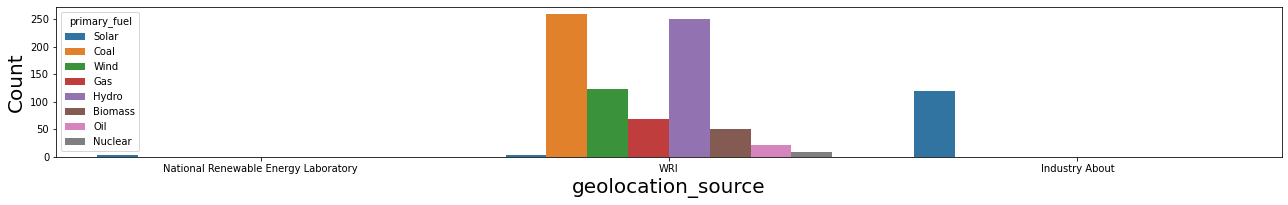

In [91]:
plt.figure(figsize=(18,25),facecolor='white')
plotnum=1
y = powrDF['primary_fuel']
X =  powrDF[['geolocation_source']]
for col in X:
    if plotnum<=23:
        plt.subplot(9,1,plotnum)
        sns.countplot(X[col],hue =y)
        plt.xlabel(col,fontsize=20)
        plt.ylabel('Count',fontsize=20)
    plotnum+=1
plt.tight_layout()

Most of the Geolocation Data is provided by WRI



# Checking for Outliers in columns with continuous distribution

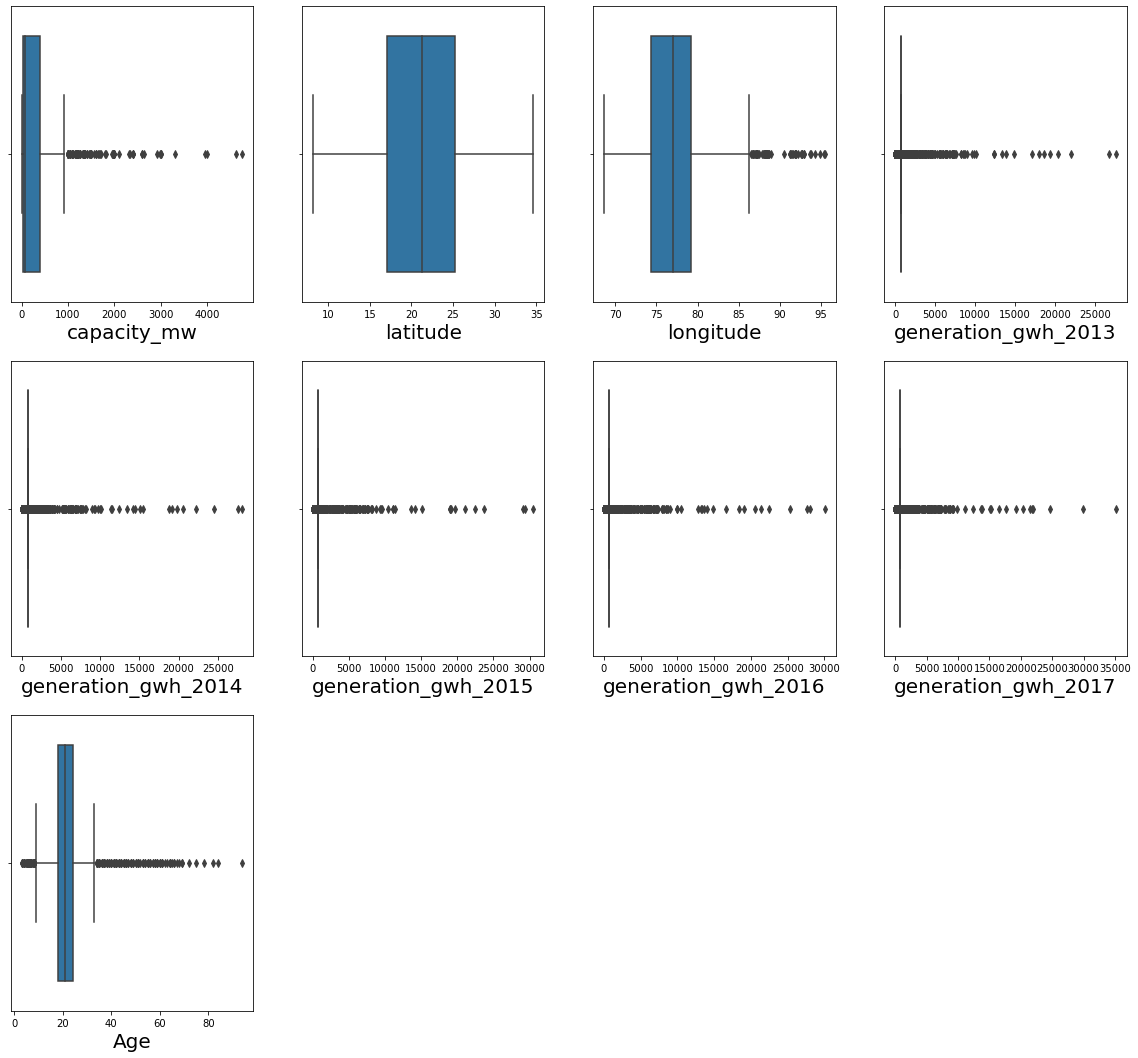

In [92]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
X = powrDF.drop(columns=['primary_fuel','geolocation_source'])
for col in X:
    if plotnum<=16:
        plt.subplot(4,4,plotnum)
        sns.boxplot(X[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

All columns except latitude have a lot of outliers

In [93]:
df2 = powrDF.drop(columns=['capacity_mw','primary_fuel','geolocation_source']).copy()

In [94]:
from scipy.stats import zscore
zscor = zscore(df2)
z_score_abs = np.abs(zscor)

df3 = df2[(z_score_abs < 3).all(axis=1)] #taking 3 as threshold value

In [95]:
df3.shape

(852, 8)

In [96]:
df2.shape

(908, 8)

# % Data loss 

In [97]:
loss=(908-852)/908 * 100
loss

6.167400881057269

6.16% Data loss is within acceptable range

In [98]:
dropindx = powrDF.index.difference(df3.index)

In [99]:
powrDF.drop(dropindx,inplace = True) #dropping the outliers from original features Dataframe

In [100]:
powrDF.shape

(852, 11)

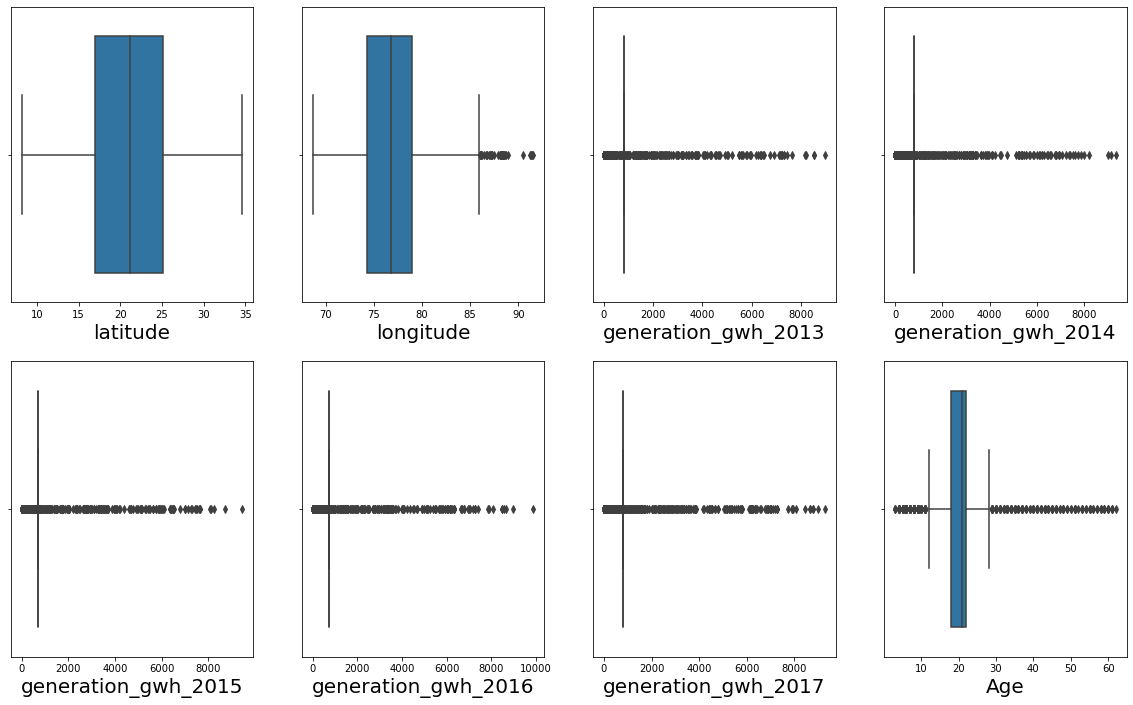

In [101]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
X = powrDF.drop(columns=['capacity_mw','primary_fuel','geolocation_source'])
for col in X:
    if plotnum<=16:
        plt.subplot(4,4,plotnum)
        sns.boxplot(X[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

Some outliers have been removed.

# Checking for Skewness in Data

In [102]:
powrDF.drop(columns=['capacity_mw','primary_fuel','geolocation_source']).skew()

latitude              -0.108867
longitude              0.861390
generation_gwh_2013    3.096648
generation_gwh_2014    2.940976
generation_gwh_2015    2.714988
generation_gwh_2016    2.635667
generation_gwh_2017    2.532066
Age                    1.209638
dtype: float64

# Skewness exists in all columns except latitude

# Reducing skewness further using PowerTransformer

In [103]:
from sklearn.preprocessing import PowerTransformer

In [104]:
powtrans= PowerTransformer(method='yeo-johnson', standardize=True)

In [105]:
df4 = powrDF.drop(columns=['capacity_mw','primary_fuel','geolocation_source']).copy()

In [106]:
transformed= powtrans.fit_transform(df4)

In [107]:
transformed = pd.DataFrame(transformed, columns=df4.columns) #to convert numpy array back into dataframe

In [108]:
transformed.skew()

latitude              -0.068918
longitude              0.000185
generation_gwh_2013    0.278188
generation_gwh_2014    0.233082
generation_gwh_2015    0.162566
generation_gwh_2016    0.146869
generation_gwh_2017    0.125694
Age                    0.026590
dtype: float64

Skewness has been greatly reduced

In [109]:
transformed.index = powrDF.index

In [110]:
powrDF[['latitude','longitude','generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','Age']]=transformed[['latitude','longitude','generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','Age']]

In [111]:
powrDF

,capacity_mw,latitude,longitude,primary_fuel,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,Age
0,2.5,1.163901,-0.932007,Solar,National Renewable Energy Laboratory,-0.044354,-0.045943,-0.052896,-0.054610,-0.039236,-1.160220
1,98.0,0.594361,-0.512059,Coal,WRI,-0.044354,-0.045943,-0.052896,-0.054610,-0.039236,0.081760
2,39.2,0.120945,-2.360637,Wind,WRI,-0.044354,-0.045943,-0.052896,-0.054610,-0.039236,0.081760
3,135.0,0.445952,2.506368,Gas,WRI,-0.259129,-0.276296,0.101229,0.118902,-0.192428,-0.311572
4,1800.0,0.130255,1.276071,Coal,WRI,0.743909,1.423753,2.285309,2.271019,1.972415,-1.812528
...,...,...,...,...,...,...,...,...,...,...,...
903,1600.0,-0.795476,0.222976,Coal,WRI,-0.044354,-0.045943,-2.448545,-0.825789,0.016799,-2.010887
904,3.0,-1.342530,0.415127,Solar,Industry About,-0.044354,-0.045943,-0.052896,-0.054610,-0.039236,0.081760
905,25.5,-0.960142,-0.236518,Wind,WRI,-0.044354,-0.045943,-0.052896,-0.054610,-0.039236,0.081760
906,80.0,0.525297,-0.771804,Coal,WRI,-0.044354,-0.045943,-0.052896,-0.054610,-0.039236,0.081760


In [112]:
powrDF2 = powrDF.copy()

# Encoding the categorical Feature Columns.


# Encoding using get_dummies()

In [113]:
dumm = pd.get_dummies(powrDF[['geolocation_source','primary_fuel']],drop_first = False)

In [114]:
powrDF2 = powrDF2.join(dumm)

In [115]:
powrDF2.drop(columns = ['geolocation_source','primary_fuel'],axis = 1, inplace = True)

In [116]:
powrDF2

,capacity_mw,latitude,longitude,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,Age,geolocation_source_Industry About,geolocation_source_National Renewable Energy Laboratory,geolocation_source_WRI,primary_fuel_Biomass,primary_fuel_Coal,primary_fuel_Gas,primary_fuel_Hydro,primary_fuel_Nuclear,primary_fuel_Oil,primary_fuel_Solar,primary_fuel_Wind
0,2.5,1.163901,-0.932007,-0.044354,-0.045943,-0.052896,-0.054610,-0.039236,-1.160220,0,1,0,0,0,0,0,0,0,1,0
1,98.0,0.594361,-0.512059,-0.044354,-0.045943,-0.052896,-0.054610,-0.039236,0.081760,0,0,1,0,1,0,0,0,0,0,0
2,39.2,0.120945,-2.360637,-0.044354,-0.045943,-0.052896,-0.054610,-0.039236,0.081760,0,0,1,0,0,0,0,0,0,0,1
3,135.0,0.445952,2.506368,-0.259129,-0.276296,0.101229,0.118902,-0.192428,-0.311572,0,0,1,0,0,1,0,0,0,0,0
4,1800.0,0.130255,1.276071,0.743909,1.423753,2.285309,2.271019,1.972415,-1.812528,0,0,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,1600.0,-0.795476,0.222976,-0.044354,-0.045943,-2.448545,-0.825789,0.016799,-2.010887,0,0,1,0,1,0,0,0,0,0,0
904,3.0,-1.342530,0.415127,-0.044354,-0.045943,-0.052896,-0.054610,-0.039236,0.081760,1,0,0,0,0,0,0,0,0,1,0
905,25.5,-0.960142,-0.236518,-0.044354,-0.045943,-0.052896,-0.054610,-0.039236,0.081760,0,0,1,0,0,0,0,0,0,0,1
906,80.0,0.525297,-0.771804,-0.044354,-0.045943,-0.052896,-0.054610,-0.039236,0.081760,0,0,1,0,1,0,0,0,0,0,0


# Finding Correlation

In [117]:
t_corr = powrDF2.corr()
t_corr


,capacity_mw,latitude,longitude,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,Age,geolocation_source_Industry About,geolocation_source_National Renewable Energy Laboratory,geolocation_source_WRI,primary_fuel_Biomass,primary_fuel_Coal,primary_fuel_Gas,primary_fuel_Hydro,primary_fuel_Nuclear,primary_fuel_Oil,primary_fuel_Solar,primary_fuel_Wind
capacity_mw,1.000000,0.047646,0.264871,0.437067,0.472641,0.529770,0.592951,0.609629,-0.330289,-0.233928,-0.032214,0.236977,-0.145095,0.482836,0.066212,-0.097285,0.164332,-0.065582,-0.240402,-0.226219
latitude,0.047646,1.000000,-0.075132,0.071133,0.107972,0.105058,0.123892,0.103338,-0.095778,0.194798,0.072961,-0.206341,-0.150842,0.055736,-0.068640,0.098074,-0.050774,-0.089913,0.203657,-0.191644
longitude,0.264871,-0.075132,1.000000,0.043394,0.038069,0.038066,0.097417,0.085258,-0.161891,-0.292285,-0.085956,0.305015,-0.057630,0.336133,0.010613,0.142559,-0.014173,-0.051091,-0.297718,-0.249304
generation_gwh_2013,0.437067,0.071133,0.043394,1.000000,0.900625,0.775650,0.729449,0.658863,0.009817,-0.017784,-0.003046,0.018132,-0.011075,0.307972,-0.123188,-0.180546,0.143608,-0.168762,-0.018478,-0.018219
generation_gwh_2014,0.472641,0.107972,0.038069,0.900625,1.000000,0.837628,0.780962,0.709653,-0.040598,-0.018421,-0.003155,0.018782,-0.011471,0.329678,-0.164219,-0.180512,0.157731,-0.167294,-0.019140,-0.018871
generation_gwh_2015,0.529770,0.105058,0.038066,0.775650,0.837628,1.000000,0.881210,0.772441,-0.107826,-0.021209,-0.003633,0.021624,-0.013207,0.338291,-0.098746,-0.201144,0.116281,-0.203248,-0.022036,-0.021728
generation_gwh_2016,0.592951,0.123892,0.097417,0.729449,0.780962,0.881210,1.000000,0.896921,-0.193612,-0.021896,-0.003751,0.022325,-0.013636,0.390060,-0.143816,-0.211305,0.082568,-0.221567,-0.022751,-0.022432
generation_gwh_2017,0.609629,0.103338,0.085258,0.658863,0.709653,0.772441,0.896921,1.000000,-0.179850,-0.015732,-0.002695,0.016040,-0.009797,0.384980,-0.156796,-0.234475,0.079906,-0.152442,-0.016346,-0.016117
Age,-0.330289,-0.095778,-0.161891,0.009817,-0.040598,-0.107826,-0.193612,-0.179850,1.000000,0.032782,-0.098186,-0.013167,0.020415,-0.334356,-0.083025,0.336870,0.039038,0.051068,-0.008627,0.033584
geolocation_source_Industry About,-0.233928,0.194798,-0.292285,-0.017784,-0.018421,-0.021209,-0.021896,-0.015732,0.032782,1.000000,-0.027538,-0.980787,-0.100113,-0.251086,-0.115229,-0.235113,-0.041429,-0.063739,0.962445,-0.164696


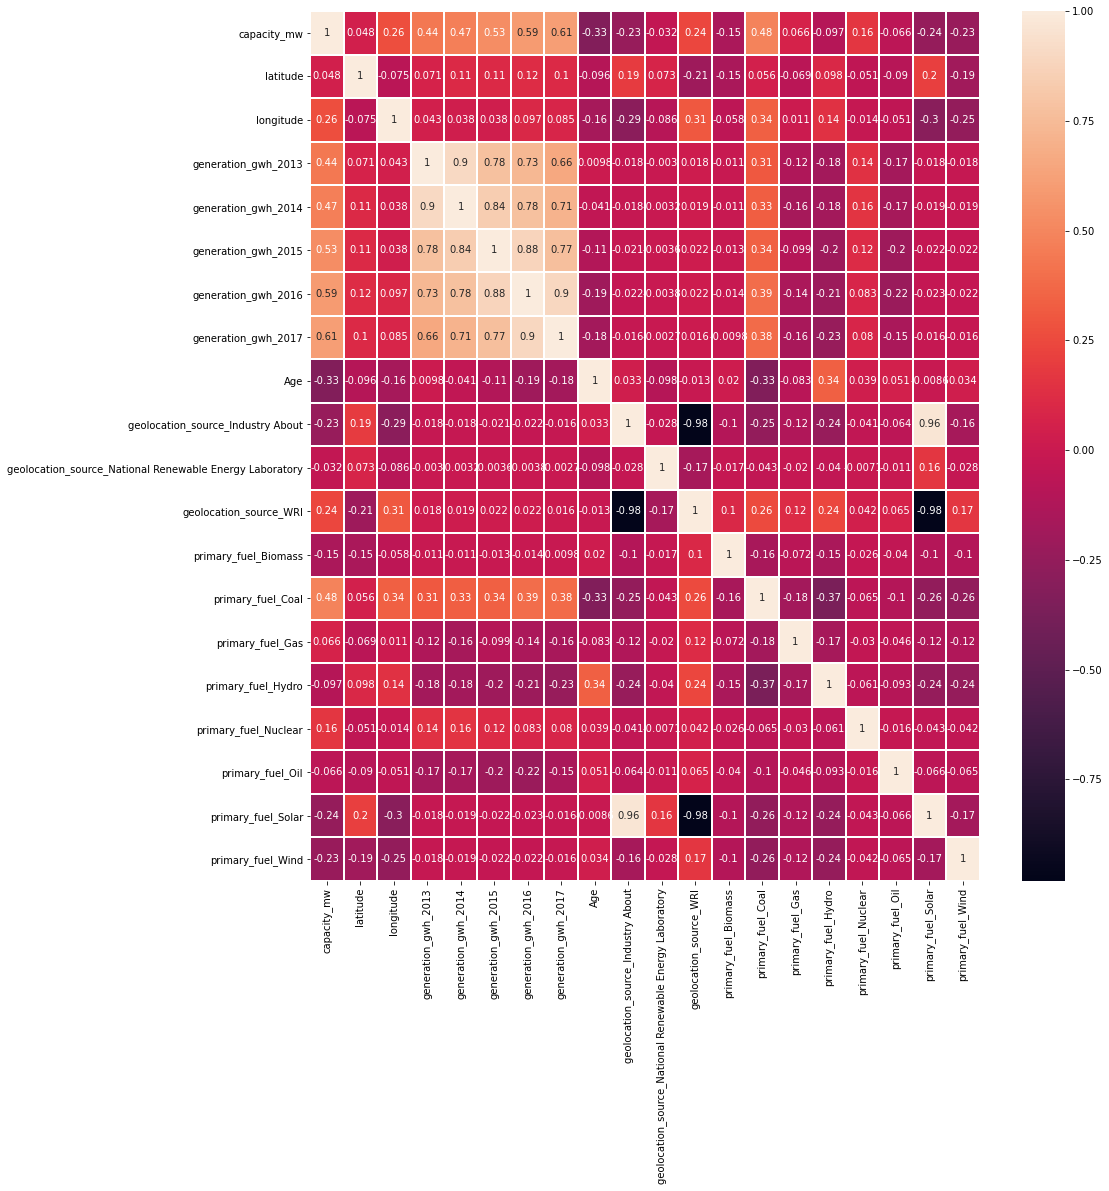

In [118]:
plt.figure(figsize=(15,16))
sns.heatmap(t_corr,annot=True,linewidth=1)
plt.show()

# Visualizing correlation of feature columns with label column.

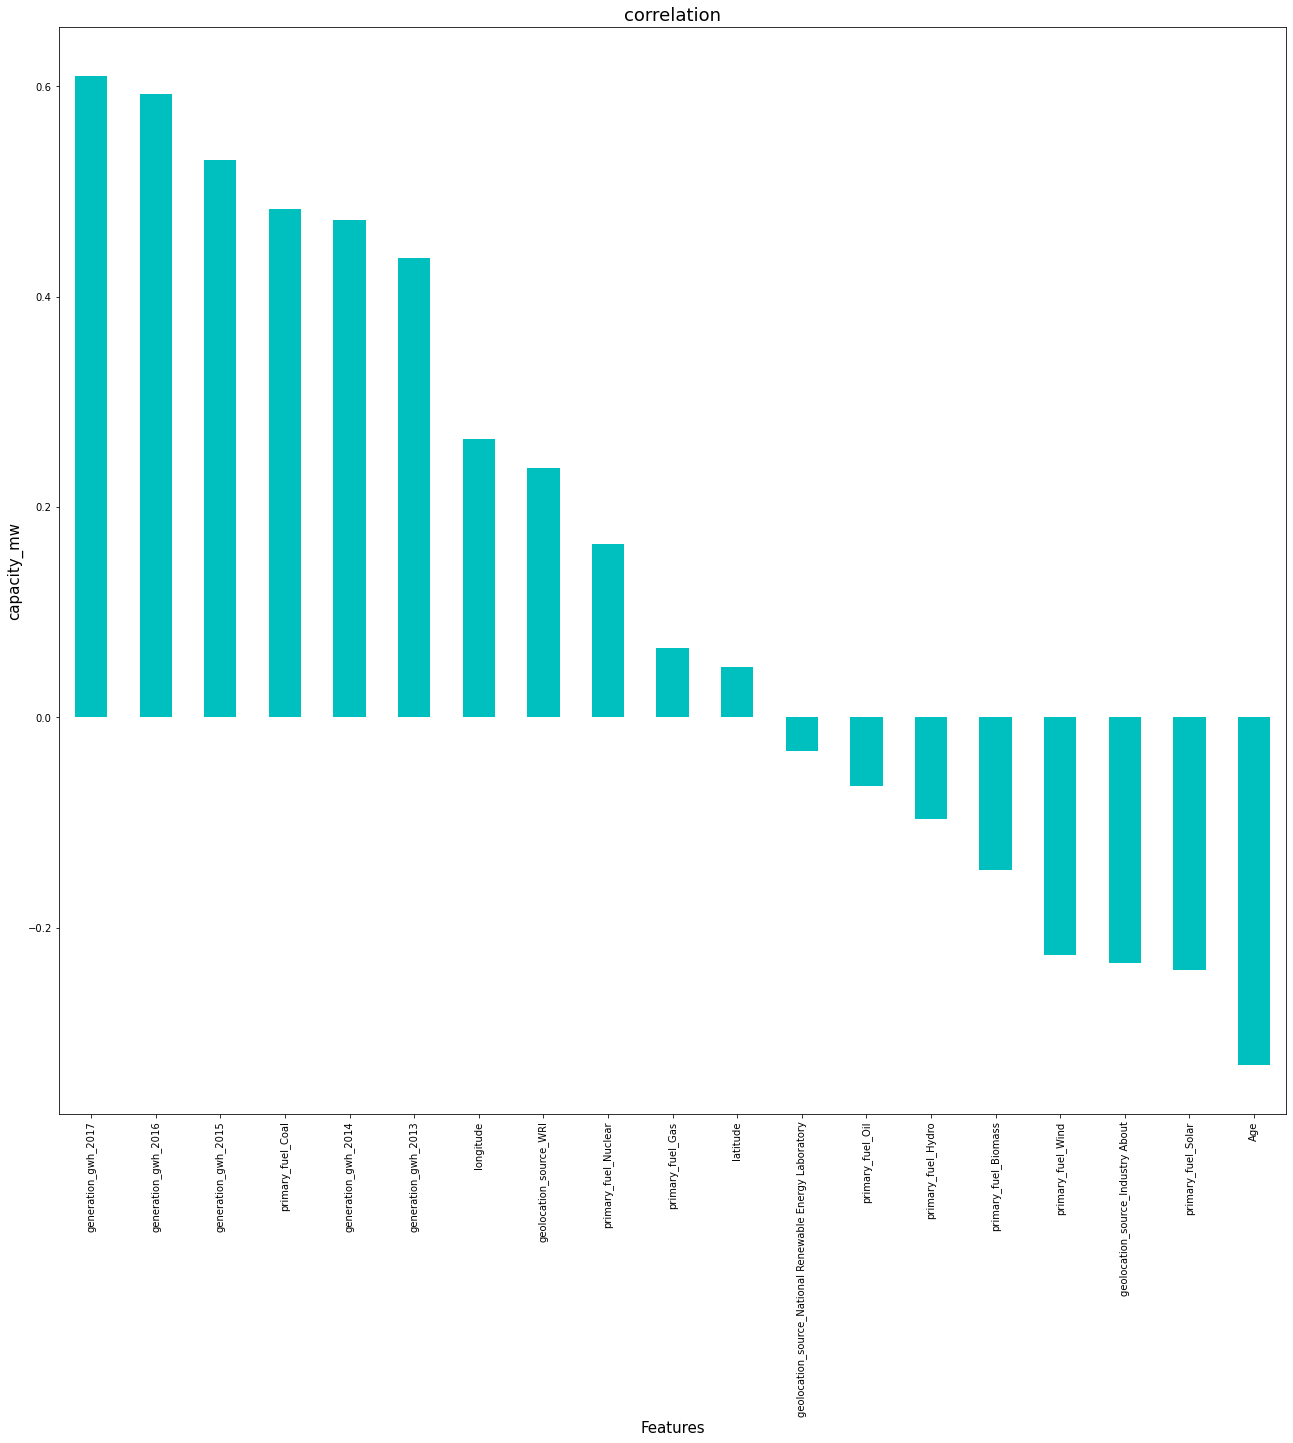

In [119]:
plt.figure(figsize = (22,20))
powrDF2.corr()['capacity_mw'].sort_values(ascending = False).drop(['capacity_mw']).plot(kind='bar',color = 'c')
plt.xlabel('Features',fontsize=15)
plt.ylabel('capacity_mw',fontsize=15)
plt.title('correlation',fontsize = 18)
plt.show()


primary_fuel_Coal,generation_gwh_2017,generation_gwh_2016,Longitude,generation_gwh_2015,geolocation_source_WRI have the highest positive correlation, while Age, Primary_fuel_Solar,geolocation_source_Industry About,Primary_fuel_Wind have the highest negative correlation with capacity_mw

# Feature Selection

In [120]:
from sklearn.preprocessing import StandardScaler

In [121]:
X = powrDF2.drop(columns = ['capacity_mw'])
y = powrDF2['capacity_mw']

In [122]:
scaler= StandardScaler()
scaled_X = scaler.fit_transform(X)

# Checking for Multicollinearity using Variance Inflation Factor

In [123]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [124]:
vif = pd.DataFrame()

In [125]:
vif["Features"] = X.columns
vif['vif'] = [variance_inflation_factor(scaled_X,i) for i in range(scaled_X.shape[1])]

In [126]:
vif.head(10)

,Features,vif
0,latitude,1.186063
1,longitude,1.370978
2,generation_gwh_2013,5.544800
3,generation_gwh_2014,7.417128
4,generation_gwh_2015,6.257602
5,generation_gwh_2016,9.921787
6,generation_gwh_2017,5.333128
7,Age,1.391057
8,geolocation_source_Industry About,inf
9,geolocation_source_National Renewable Energy L...,inf


multicollinearity exists amongst generation_gwh_2014,generation_gwh_2015,generation_gwh_2016

# Principle Component Analysis

In [127]:
from sklearn.decomposition import PCA

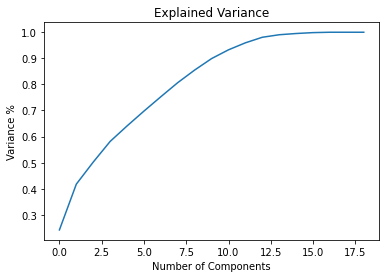

In [128]:
pca = PCA()
principleComponents = pca.fit_transform(scaled_X)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained Variance')
plt.show()


15 components explain around 95% variance in Data

# Selecting Kbest Features

In [129]:
from sklearn.feature_selection import SelectKBest, f_classif

In [130]:
bestfeat = SelectKBest(score_func = f_classif, k = 19)
fit = bestfeat.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [131]:
fit = bestfeat.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
dfcolumns.head()
featureScores = pd.concat([dfcolumns,dfscores],axis = 1)
featureScores.columns = ['Feature', 'Score']
print(featureScores.nlargest(19,'Score'))

                                              Feature     Score
13                                   primary_fuel_Gas  5.618786
6                                 generation_gwh_2017  4.680588
5                                 generation_gwh_2016  4.210302
3                                 generation_gwh_2014  3.364710
18                                  primary_fuel_Wind  3.352449
8                   geolocation_source_Industry About  3.351059
10                             geolocation_source_WRI  3.231852
17                                 primary_fuel_Solar  3.163634
4                                 generation_gwh_2015  3.140176
12                                  primary_fuel_Coal  3.074000
2                                 generation_gwh_2013  3.049878
15                               primary_fuel_Nuclear  2.616195
16                                   primary_fuel_Oil  2.366212
7                                                 Age  2.280104
14                                 prima

# Dropping highly multicollinear column: 'generation_gwh_2016'.

In [132]:
x_best = X.drop(columns=['generation_gwh_2016']).copy()

In [133]:
scaled_x_best = scaler.fit_transform(x_best)

# Target/ Label column ('capacity_mw') has Continuous type of Data.

# Regression Model Building

In [134]:
from sklearn.model_selection import train_test_split

In [135]:
from sklearn.metrics import r2_score

# Finding the Best Random State

In [136]:
from sklearn.ensemble import RandomForestRegressor
maxAcc = 0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(scaled_x_best,y,test_size = .31, random_state = i)
    modRF =  RandomForestRegressor()
    modRF.fit(x_train,y_train)
    pred = modRF.predict(x_test)
    acc  = r2_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print(f"Best Accuracy is: {maxAcc} on random_state: {maxRS}")

Best Accuracy is: 0.8538523038352194 on random_state: 7


In [137]:
x_train,x_test,y_train,y_test = train_test_split(scaled_x_best,y,test_size = .31, random_state =7)

In [138]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR

In [139]:
from sklearn.metrics import r2_score,mean_squared_error

In [140]:
rf = RandomForestRegressor()
dt = DecisionTreeRegressor()
xg = XGBRegressor()
SV= SVR()
r=Ridge()

# Training the Models

In [141]:
rf.fit(x_train,y_train)
xg.fit(x_train,y_train)
SV.fit(x_train,y_train)
r.fit(x_train,y_train)
dt.fit(x_train,y_train)

DecisionTreeRegressor()

All models have been trained.

# Ridge Regression Model

In [142]:
y_r_pred = r.predict(x_test)
r2_score(y_test,y_r_pred)

0.6230497883429118

In [143]:
mean_squared_error(y_test,y_r_pred)

63210.37742191082

In [144]:
np.sqrt(mean_squared_error(y_test,y_r_pred))

251.4167405363271

# Random Forest Regression Model

In [145]:
y_rf_pred = rf.predict(x_test)
r2_score(y_test,y_rf_pred)

0.848068680201365

In [146]:
mean_squared_error(y_test,y_rf_pred)

25477.20035614989

In [147]:
np.sqrt(mean_squared_error(y_test,y_rf_pred))

159.61578980837044

# XGB Regression Model

In [148]:
y_xg_pred = xg.predict(x_test)
r2_score(y_test,y_xg_pred)

0.8146951036087696

In [149]:
mean_squared_error(y_test,y_xg_pred)

31073.579684505527

In [150]:

np.sqrt(mean_squared_error(y_test,y_xg_pred))

176.27699703734893

# Support Vector Regression Model

In [151]:
y_svr_pred = SV.predict(x_test)
r2_score(y_test,y_svr_pred)

-0.15821627879547107

In [152]:
mean_squared_error(y_test,y_svr_pred)

194220.0477803768

In [153]:
np.sqrt(mean_squared_error(y_test,y_svr_pred))

440.7040364920394

# Decision Tree Regression Model

In [154]:
y_dt_pred = dt.predict(x_test)
r2_score(y_test,y_dt_pred)

0.623688552149464

In [155]:
mean_squared_error(y_test,y_dt_pred)

63103.26380306415

In [156]:
np.sqrt(mean_squared_error(y_test,y_dt_pred))

251.2036301550281

# Model Cross Validation

In [157]:
from sklearn.model_selection import ShuffleSplit,cross_val_score

# Ridge Regression

In [158]:
cross_val_score(r,scaled_x_best,y,cv=5).mean()

0.5651198340071018

# Random Forest Regression

In [159]:
cross_val_score(rf,scaled_x_best,y,cv=5).mean()

0.7631913723555368

# XGB Regression

In [160]:
cross_val_score(xg,scaled_x_best,y,cv=5).mean()

0.711487456489122

# SV Regression

In [161]:
cross_val_score(SV,scaled_x_best,y,cv=5).mean()

-0.14661599017394972

# Decision Tree Regression

In [162]:
cross_val_score(dt,scaled_x_best,y,cv=5).mean()

0.5758790284043405

# Based on comparing Accuracy Score results with Cross Validation results, it is determined that Random Forest Regressor is the best model. It also has the lowest Root Mean Squared Error score


# Hyper Parameter Tuning


# Random Forest Regressor

In [164]:
parameter = {'n_estimators':[30,60,80,100],'max_depth': [10,20,40,60],'min_samples_leaf':[5,10,20],'min_samples_split':[5,10,20],'criterion':['mse','mae'],'max_features':["auto","sqrt","log2"]}

In [165]:
GridCV = GridSearchCV(RandomForestRegressor(),parameter,cv=5,n_jobs = -1,verbose = 1)

In [166]:
GridCV.fit(x_train,y_train)

Fitting 5 folds for each of 864 candidates, totalling 4320 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['mse', 'mae'],
                         'max_depth': [10, 20, 40, 60],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [5, 10, 20],
                         'min_samples_split': [5, 10, 20],
                         'n_estimators': [30, 60, 80, 100]},
             verbose=1)

In [167]:
GridCV.best_params_

{'criterion': 'mse',
 'max_depth': 10,
 'max_features': 'log2',
 'min_samples_leaf': 5,
 'min_samples_split': 10,
 'n_estimators': 30}

In [168]:
Best_mod1 = RandomForestRegressor(n_estimators = 100,criterion = 'mse', max_depth= 20, max_features = 'sqrt',min_samples_leaf = 5, min_samples_split = 10)

In [169]:
Best_mod1.fit(x_train,y_train)

RandomForestRegressor(max_depth=20, max_features='sqrt', min_samples_leaf=5,
                      min_samples_split=10)

In [170]:
rfpred = Best_mod1.predict(x_test)
acc = r2_score(y_test,rfpred)
print(acc*100)

85.96010362711397


# Random Forest Regressor has an accuracy of 86.35%


# Saving The Model

In [171]:
import joblib
joblib.dump(Best_mod1,"BestModelpowercapacity.pkl")

['BestModelpowercapacity.pkl']

# Loading The Model

In [172]:
mod=joblib.load("BestModelpowercapacity.pkl")

In [173]:
print(mod.predict(x_test))

[  28.05523011   97.09921099   26.92991139  392.24110777  389.4508247
  104.82363322   17.51829719 1120.17517719   29.46128888 1157.56555767
  942.40294802  231.56577366   28.05523011   74.3615826  1160.6550929
  103.7196674    66.5872686    25.06665237  467.39110136 1121.63242878
  398.25422442   33.76263993   14.62792138  129.92320805   29.05678895
  329.91848997   29.16666667   90.50855171   32.91463871 1156.99509146
  463.82918613   18.25073839   25.98313401  125.70754188  231.11185238
  829.61221505   33.83241972   82.10796941   82.316023    104.44618135
   25.93845      66.76803183   85.99018461 1100.10782718  103.51604674
   96.17918883  142.28535642  100.68911119  111.20145889  583.48935761
  139.87155862 1315.78286495  164.72421839   88.04661021  103.00761405
  210.19343383  598.13254189   35.81766334  705.44765973   92.80543137
  314.28255726  504.57406481   27.07173988   38.09992926   60.72834522
   37.47117098   29.92722495  167.2534679   500.87022553  453.39106534
  425.36

In [174]:
Prediction_accuracy = pd.DataFrame({'Predictions': mod.predict(x_test), 'Actual Values': y_test})
Prediction_accuracy.head(20)

,Predictions,Actual Values
362,28.055230,26.000
451,97.099211,15.000
338,26.929911,18.000
211,392.241108,431.586
869,389.450825,186.200
292,104.823633,54.500
403,17.518297,20.000
598,1120.175177,1980.000
339,29.461289,16.000
148,1157.565558,1660.000


# Target/ Label column ('primary_fuel') has Categorical type of Data.


# Classification Model Building


# Encoding the categorical Feature Column.


# Encoding using get_dummies()

In [175]:
dumm = pd.get_dummies(powrDF[['geolocation_source']],drop_first = False)

In [176]:
powrDF = powrDF.join(dumm)

In [177]:
powrDF.drop(columns = ['geolocation_source'],axis = 1, inplace = True)

# Encoding the Label Column.
Encoding the categorical data using Label Encoding Technique

In [178]:
from sklearn.preprocessing import LabelEncoder

In [179]:
labenc = LabelEncoder()

In [180]:
powrDF['primary_fuel'] = labenc.fit_transform(powrDF['primary_fuel'])

In [181]:

powrDF

,capacity_mw,latitude,longitude,primary_fuel,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,Age,geolocation_source_Industry About,geolocation_source_National Renewable Energy Laboratory,geolocation_source_WRI
0,2.5,1.163901,-0.932007,6,-0.044354,-0.045943,-0.052896,-0.054610,-0.039236,-1.160220,0,1,0
1,98.0,0.594361,-0.512059,1,-0.044354,-0.045943,-0.052896,-0.054610,-0.039236,0.081760,0,0,1
2,39.2,0.120945,-2.360637,7,-0.044354,-0.045943,-0.052896,-0.054610,-0.039236,0.081760,0,0,1
3,135.0,0.445952,2.506368,2,-0.259129,-0.276296,0.101229,0.118902,-0.192428,-0.311572,0,0,1
4,1800.0,0.130255,1.276071,1,0.743909,1.423753,2.285309,2.271019,1.972415,-1.812528,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,1600.0,-0.795476,0.222976,1,-0.044354,-0.045943,-2.448545,-0.825789,0.016799,-2.010887,0,0,1
904,3.0,-1.342530,0.415127,6,-0.044354,-0.045943,-0.052896,-0.054610,-0.039236,0.081760,1,0,0
905,25.5,-0.960142,-0.236518,7,-0.044354,-0.045943,-0.052896,-0.054610,-0.039236,0.081760,0,0,1
906,80.0,0.525297,-0.771804,1,-0.044354,-0.045943,-0.052896,-0.054610,-0.039236,0.081760,0,0,1


# Finding Correlation

In [182]:
c_corr = powrDF.corr()
c_corr

,capacity_mw,latitude,longitude,primary_fuel,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,Age,geolocation_source_Industry About,geolocation_source_National Renewable Energy Laboratory,geolocation_source_WRI
capacity_mw,1.000000,0.047646,0.264871,-0.398618,0.437067,0.472641,0.529770,0.592951,0.609629,-0.330289,-0.233928,-0.032214,0.236977
latitude,0.047646,1.000000,-0.075132,-0.004801,0.071133,0.107972,0.105058,0.123892,0.103338,-0.095778,0.194798,0.072961,-0.206341
longitude,0.264871,-0.075132,1.000000,-0.408154,0.043394,0.038069,0.038066,0.097417,0.085258,-0.161891,-0.292285,-0.085956,0.305015
primary_fuel,-0.398618,-0.004801,-0.408154,1.000000,-0.137352,-0.140825,-0.160769,-0.180194,-0.162065,0.157473,0.471385,0.080745,-0.480620
generation_gwh_2013,0.437067,0.071133,0.043394,-0.137352,1.000000,0.900625,0.775650,0.729449,0.658863,0.009817,-0.017784,-0.003046,0.018132
generation_gwh_2014,0.472641,0.107972,0.038069,-0.140825,0.900625,1.000000,0.837628,0.780962,0.709653,-0.040598,-0.018421,-0.003155,0.018782
generation_gwh_2015,0.529770,0.105058,0.038066,-0.160769,0.775650,0.837628,1.000000,0.881210,0.772441,-0.107826,-0.021209,-0.003633,0.021624
generation_gwh_2016,0.592951,0.123892,0.097417,-0.180194,0.729449,0.780962,0.881210,1.000000,0.896921,-0.193612,-0.021896,-0.003751,0.022325
generation_gwh_2017,0.609629,0.103338,0.085258,-0.162065,0.658863,0.709653,0.772441,0.896921,1.000000,-0.179850,-0.015732,-0.002695,0.016040
Age,-0.330289,-0.095778,-0.161891,0.157473,0.009817,-0.040598,-0.107826,-0.193612,-0.179850,1.000000,0.032782,-0.098186,-0.013167


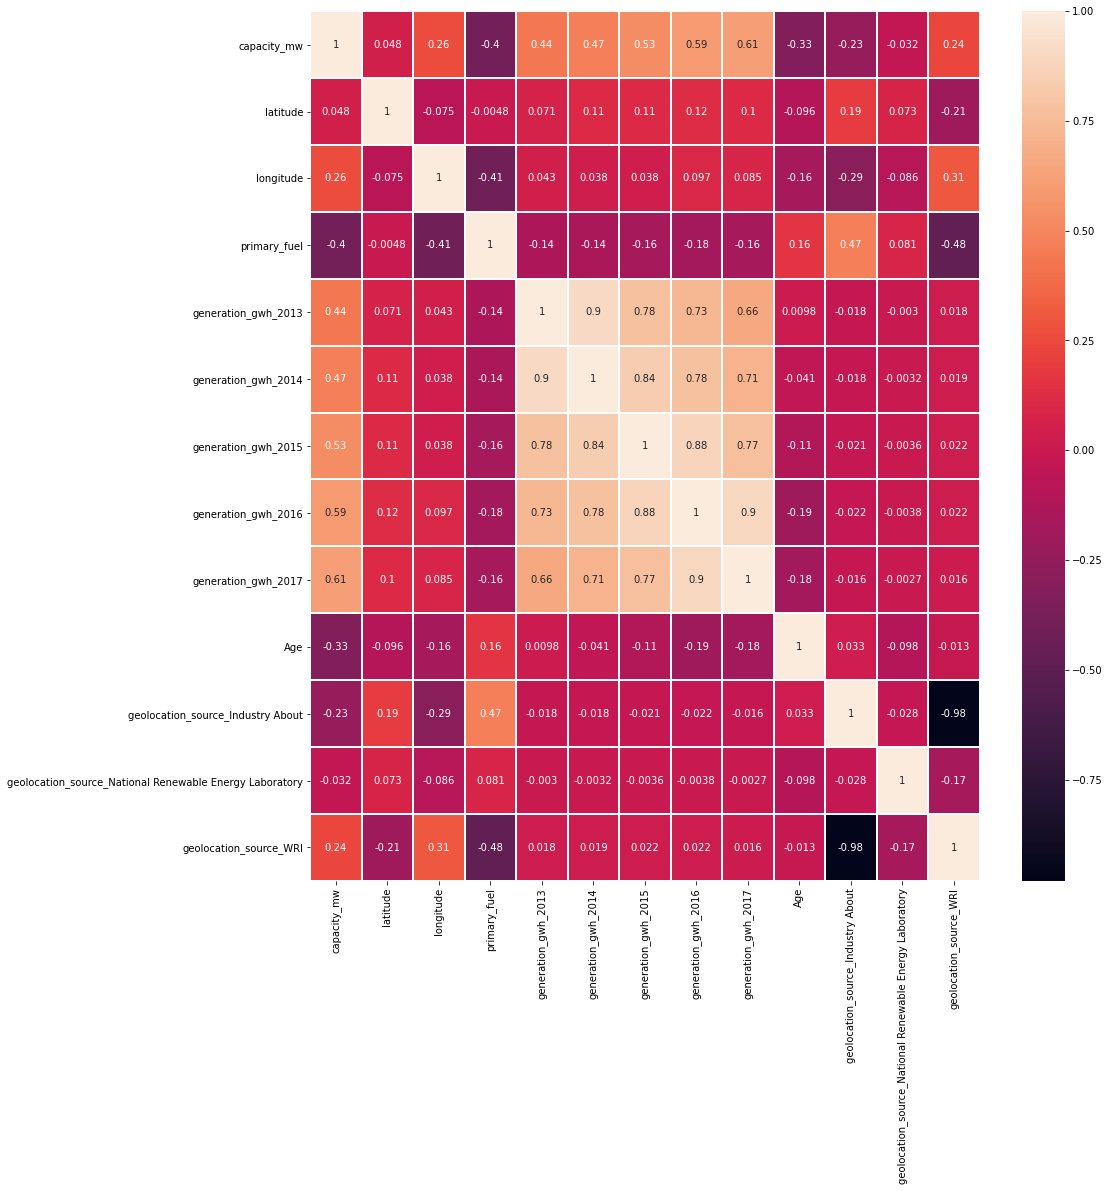

In [183]:
plt.figure(figsize=(15,16))
sns.heatmap(c_corr,annot=True,linewidth=1)
plt.show()

# Visualizing correlation of feature columns with label column.

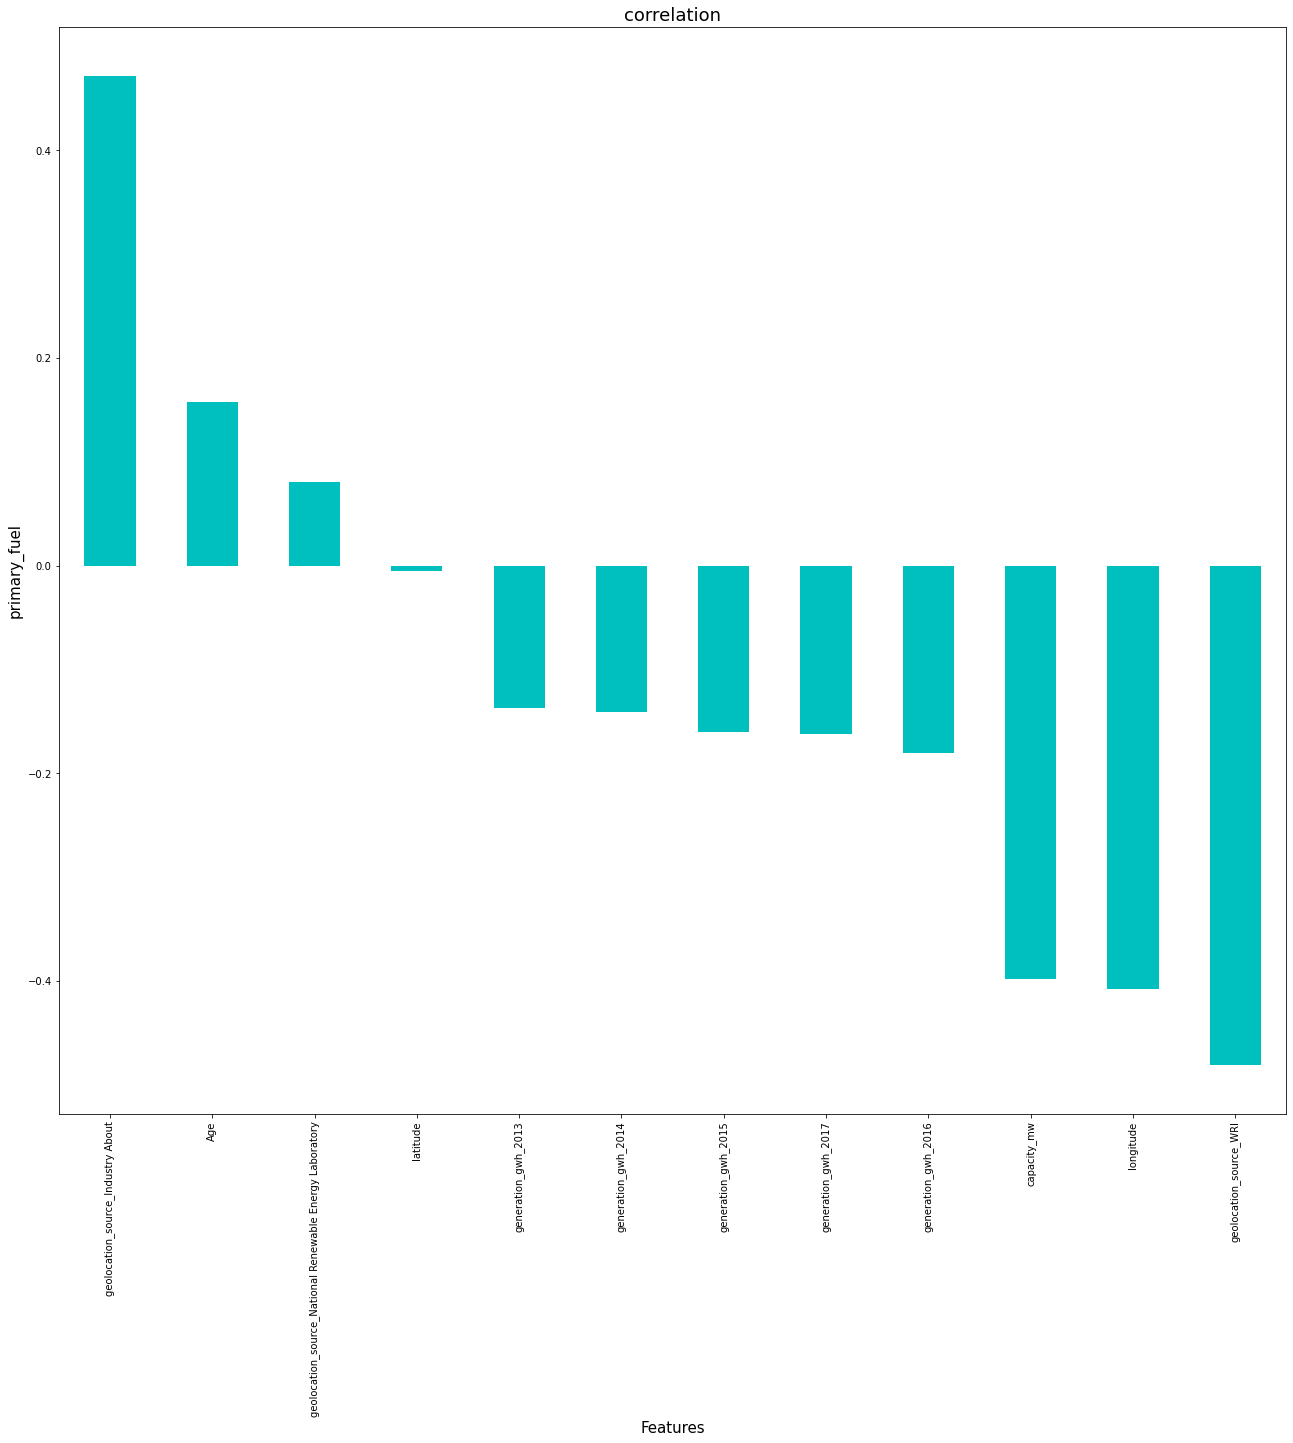

In [184]:
plt.figure(figsize = (22,20))
powrDF.corr()['primary_fuel'].sort_values(ascending = False).drop(['primary_fuel']).plot(kind='bar',color = 'c')
plt.xlabel('Features',fontsize=15)
plt.ylabel('primary_fuel',fontsize=15)
plt.title('correlation',fontsize = 18)
plt.show()

# geolocation_source_Industry About has the highest positive correlation followed by Age,Geolocation_source_WRI,longitude and capacity_mw have the highest negative correlation with primary_fuel

In [185]:
X = powrDF.drop(columns = ['primary_fuel'])
y = powrDF['primary_fuel']


# Feature Selection

In [188]:
from sklearn.preprocessing import StandardScaler

In [189]:
scaler= StandardScaler()
scaled_X = scaler.fit_transform(X)

# Checking for Multicollinearity using Variance Inflation Factor

In [190]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [191]:
vif = pd.DataFrame()

In [192]:
vif["Features"] = X.columns
vif['vif'] = [variance_inflation_factor(scaled_X,i) for i in range(scaled_X.shape[1])]

In [193]:
vif.head(10)

,Features,vif
0,capacity_mw,1.996572
1,latitude,1.077803
2,longitude,1.187586
3,generation_gwh_2013,5.480753
4,generation_gwh_2014,7.243784
5,generation_gwh_2015,6.197324
6,generation_gwh_2016,9.687712
7,generation_gwh_2017,5.530811
8,Age,1.233404
9,geolocation_source_Industry About,inf


multicollinearity exists among generation_gwh_2014,generation_gwh_2016,generation_gwh_2015

# Principle Component Analysis

In [194]:
from sklearn.decomposition import PCA

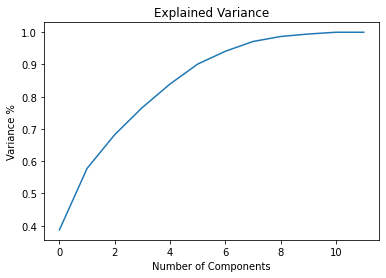

In [195]:
pca = PCA()
principleComponents = pca.fit_transform(scaled_X)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained Variance')
plt.show()

10 components explain around 95% variance in Data

# Selecting Kbest Features

In [196]:
from sklearn.feature_selection import SelectKBest, f_classif

In [197]:
bestfeat = SelectKBest(score_func = f_classif, k = 12)
fit = bestfeat.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [198]:
fit = bestfeat.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
dfcolumns.head()
featureScores = pd.concat([dfcolumns,dfscores],axis = 1)
featureScores.columns = ['Feature', 'Score']
print(featureScores.nlargest(64,'Score'))

                                              Feature        Score
11                             geolocation_source_WRI  3133.583501
9                   geolocation_source_Industry About  1515.421529
0                                         capacity_mw    57.345805
2                                           longitude    36.211199
6                                 generation_gwh_2016    33.472687
7                                 generation_gwh_2017    30.068363
4                                 generation_gwh_2014    26.445974
8                                                 Age    25.857489
5                                 generation_gwh_2015    25.747680
3                                 generation_gwh_2013    22.163554
1                                            latitude    15.262667
10  geolocation_source_National Renewable Energy L...     3.368539


# Dropping highly collinear column 'generation_gwh_2016' and column with lowest sccore

In [199]:
x_best = X.drop(columns=['generation_gwh_2016','geolocation_source_National Renewable Energy Laboratory']).copy()

In [200]:
scaled_x_best = scaler.fit_transform(x_best)

# Classification Model Building

In [201]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [202]:
from imblearn.over_sampling import SMOTE as sm

In [203]:
smt_x,smt_y = sm().fit_resample(scaled_x_best,y.ravel()) #since class imbalace exists

# Finding the best random state

In [204]:
from sklearn.ensemble import RandomForestClassifier
maxAcc = 0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(smt_x,smt_y,test_size = .31, random_state = i)
    modRF =  RandomForestClassifier()
    modRF.fit(x_train,y_train)
    pred = modRF.predict(x_test)
    acc  = accuracy_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print(f"Best Accuracy is: {maxAcc} on random_state: {maxRS}")

Best Accuracy is: 0.9295302013422819 on random_state: 72


In [205]:
x_train,x_test,y_train,y_test = train_test_split(smt_x,smt_y,test_size = .31,random_state = 24)

In [206]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve

In [207]:
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [208]:
RFC = RandomForestClassifier()
XGBC= XGBClassifier()
adbc = AdaBoostClassifier()
LOGR= LogisticRegression(solver='liblinear')
SV =  SVC(probability=True)
KNN = KNeighborsClassifier()

# Training the Models

In [209]:
RFC.fit(x_train,y_train.ravel())
XGBC.fit(x_train,y_train.ravel())
adbc.fit(x_train,y_train.ravel())
SV.fit(x_train,y_train.ravel())
LOGR.fit(x_train,y_train.ravel())
KNN.fit(x_train,y_train.ravel())

[10:22:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


KNeighborsClassifier()

All Models have been trained.

# Logistic Regression Model Accuracy

In [210]:
LOGRpred = LOGR.predict(x_test)
accu = classification_report(y_test,LOGRpred)

In [211]:
conf_matrx = confusion_matrix(y_test,LOGRpred)
conf_matrx

array([[47,  0,  0,  0,  0,  0,  0, 31],
       [10, 27,  2,  8, 14,  2,  0,  5],
       [ 1,  9, 20, 13,  6, 13,  0, 13],
       [ 8, 13,  3, 23, 11,  6,  0,  2],
       [ 0,  0,  0,  0, 66,  1,  0,  0],
       [ 2,  0,  0,  7,  0, 37,  0, 30],
       [ 1,  1,  0,  0,  0,  0, 83,  0],
       [41,  0,  0,  1,  0,  0,  0, 39]], dtype=int64)

In [212]:
print(accu)

              precision    recall  f1-score   support

           0       0.43      0.60      0.50        78
           1       0.54      0.40      0.46        68
           2       0.80      0.27      0.40        75
           3       0.44      0.35      0.39        66
           4       0.68      0.99      0.80        67
           5       0.63      0.49      0.55        76
           6       1.00      0.98      0.99        85
           7       0.33      0.48      0.39        81

    accuracy                           0.57       596
   macro avg       0.61      0.57      0.56       596
weighted avg       0.61      0.57      0.57       596



# Random Forest Classifier Model Accuracy

In [213]:
RFCpred = RFC.predict(x_test)
accu = classification_report(y_test,RFCpred)

In [214]:
conf_matrx = confusion_matrix(y_test,RFCpred)
conf_matrx

array([[75,  2,  0,  0,  0,  0,  0,  1],
       [ 2, 47,  7,  4,  3,  1,  0,  4],
       [ 0,  2, 69,  0,  1,  3,  0,  0],
       [ 0,  3,  1, 56,  3,  2,  0,  1],
       [ 0,  0,  0,  0, 67,  0,  0,  0],
       [ 0,  1,  1,  0,  0, 73,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 85,  0],
       [ 4,  0,  0,  0,  0,  0,  0, 77]], dtype=int64)

In [215]:
print(accu)

              precision    recall  f1-score   support

           0       0.93      0.96      0.94        78
           1       0.85      0.69      0.76        68
           2       0.88      0.92      0.90        75
           3       0.93      0.85      0.89        66
           4       0.91      1.00      0.95        67
           5       0.92      0.96      0.94        76
           6       1.00      1.00      1.00        85
           7       0.92      0.95      0.93        81

    accuracy                           0.92       596
   macro avg       0.92      0.92      0.92       596
weighted avg       0.92      0.92      0.92       596



# XGB Classifier Model Accuracy

In [216]:
XGBCpred = XGBC.predict(x_test)
accu = classification_report(y_test,XGBCpred)

In [217]:
conf_matrx = confusion_matrix(y_test,XGBCpred)
conf_matrx

array([[74,  2,  1,  0,  0,  0,  0,  1],
       [ 1, 50,  5,  4,  4,  1,  0,  3],
       [ 0,  4, 65,  0,  0,  6,  0,  0],
       [ 0,  2,  2, 58,  2,  2,  0,  0],
       [ 0,  0,  0,  0, 67,  0,  0,  0],
       [ 0,  1,  0,  0,  0, 74,  0,  1],
       [ 0,  1,  0,  1,  0,  0, 83,  0],
       [ 2,  0,  0,  0,  0,  0,  0, 79]], dtype=int64)

In [218]:
print(accu)

              precision    recall  f1-score   support

           0       0.96      0.95      0.95        78
           1       0.83      0.74      0.78        68
           2       0.89      0.87      0.88        75
           3       0.92      0.88      0.90        66
           4       0.92      1.00      0.96        67
           5       0.89      0.97      0.93        76
           6       1.00      0.98      0.99        85
           7       0.94      0.98      0.96        81

    accuracy                           0.92       596
   macro avg       0.92      0.92      0.92       596
weighted avg       0.92      0.92      0.92       596



# AdaBoost Classifier Model Accuracy

In [219]:
adbcpred = adbc.predict(x_test)
accu = classification_report(y_test,adbcpred)

In [220]:
conf_matrx = confusion_matrix(y_test,adbcpred)
conf_matrx

array([[ 0,  0,  0,  0, 78,  0,  0,  0],
       [ 0, 15,  0,  0, 53,  0,  0,  0],
       [ 0,  7,  0,  0, 68,  0,  0,  0],
       [ 0,  6,  0,  0, 60,  0,  0,  0],
       [ 0,  1,  0,  0, 66,  0,  0,  0],
       [ 0,  0,  0,  0, 76,  0,  0,  0],
       [ 0,  1,  0,  0,  2,  0, 82,  0],
       [ 0,  0,  0,  0, 81,  0,  0,  0]], dtype=int64)

In [221]:
print(accu)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        78
           1       0.50      0.22      0.31        68
           2       0.00      0.00      0.00        75
           3       0.00      0.00      0.00        66
           4       0.14      0.99      0.24        67
           5       0.00      0.00      0.00        76
           6       1.00      0.96      0.98        85
           7       0.00      0.00      0.00        81

    accuracy                           0.27       596
   macro avg       0.20      0.27      0.19       596
weighted avg       0.21      0.27      0.20       596



# SV Classifier Model Accuracy

In [222]:
SVpred = SV.predict(x_test)
accu = classification_report(y_test,SVpred)
conf_matrx = confusion_matrix(y_test,SVpred)
conf_matrx

array([[69,  7,  0,  0,  0,  0,  0,  2],
       [11, 37,  5,  5,  5,  1,  0,  4],
       [ 2,  6, 44,  1,  6, 13,  0,  3],
       [ 3,  9,  2, 41,  4,  4,  0,  3],
       [ 0,  0,  1,  0, 66,  0,  0,  0],
       [10,  1,  0,  0,  0, 65,  0,  0],
       [ 0,  2,  0,  0,  0,  0, 83,  0],
       [34,  0,  0,  0,  0,  1,  0, 46]], dtype=int64)

In [223]:
print(accu)

              precision    recall  f1-score   support

           0       0.53      0.88      0.67        78
           1       0.60      0.54      0.57        68
           2       0.85      0.59      0.69        75
           3       0.87      0.62      0.73        66
           4       0.81      0.99      0.89        67
           5       0.77      0.86      0.81        76
           6       1.00      0.98      0.99        85
           7       0.79      0.57      0.66        81

    accuracy                           0.76       596
   macro avg       0.78      0.75      0.75       596
weighted avg       0.78      0.76      0.75       596



# K Nearest Neighbours Classifier Model Accuracy

In [224]:
KNNpred = KNN.predict(x_test)
accu = classification_report(y_test,KNNpred)

In [225]:
conf_matrx = confusion_matrix(y_test,KNNpred)
conf_matrx

array([[72,  4,  0,  0,  0,  0,  0,  2],
       [ 3, 38, 11,  5,  7,  2,  0,  2],
       [ 0,  5, 60,  1,  0,  6,  1,  2],
       [ 0, 10,  4, 44,  2,  1,  0,  5],
       [ 0,  0,  1,  0, 66,  0,  0,  0],
       [ 2,  2,  1,  0,  0, 70,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 85,  0],
       [ 3,  2,  0,  0,  0,  0,  0, 76]], dtype=int64)

In [226]:
print(accu)

              precision    recall  f1-score   support

           0       0.90      0.92      0.91        78
           1       0.62      0.56      0.59        68
           2       0.78      0.80      0.79        75
           3       0.88      0.67      0.76        66
           4       0.88      0.99      0.93        67
           5       0.89      0.92      0.90        76
           6       0.99      1.00      0.99        85
           7       0.86      0.94      0.90        81

    accuracy                           0.86       596
   macro avg       0.85      0.85      0.85       596
weighted avg       0.85      0.86      0.85       596



# Model Cross Validation

In [227]:
from sklearn.model_selection import cross_val_score as cvs

# Logistic Regression

In [228]:
print(cvs(LOGR,smt_x,smt_y,cv=5).mean())

0.5697916666666668


# Random Forest Classifier

In [229]:
print(cvs(RFC,smt_x,smt_y,cv=5).mean())

0.9130208333333334


# XGB Classifier

In [230]:
print(cvs(XGBC,smt_x,smt_y,cv=5).mean())

[10:28:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:28:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:28:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:28:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

# Adaboost Classifier

In [231]:
print(cvs(adbc,smt_x,smt_y,cv=5).mean())

0.2786458333333333


# SV Classifier

In [232]:
print(cvs(SV,smt_x,smt_y,cv=5).mean())

0.7578125000000001


# K Nearest Neighbours Classifier

In [233]:
print(cvs(KNN,smt_x,smt_y,cv=5).mean())

0.8541666666666666


# Based on comparing Accuracy Score results, with Cross Validation results, it is determined that RandomForest Classifier is the best model.¶


# ROC AUC Scores

In [240]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [235]:
pip install scikit-plot

Note: you may need to restart the kernel to use updated packages.


In [236]:
import scikitplot as sktplt

# Logistic Regression

In [237]:
lr_prob = LOGR.predict_proba(x_test)

In [241]:
roc_auc_score(y_test,lr_prob,multi_class='ovo',average='weighted')

0.8968610688555669

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

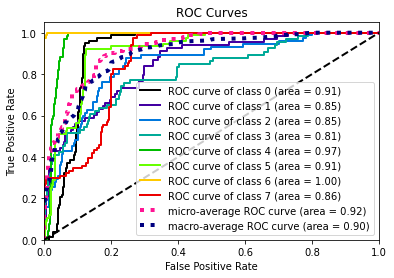

In [242]:
sktplt.metrics.plot_roc(y_test,lr_prob)

# SV Classifier

In [243]:
SV=SVC(probability=True)

In [244]:
SV=SVC(probability=True).fit(x_train,y_train.ravel())

In [245]:
SVpred = SV.predict(x_test)

In [246]:
sv_prb = SV.predict_proba(x_test)

In [247]:
roc_auc_score(y_test,sv_prb,multi_class='ovo',average='weighted')

0.9610438664907628

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

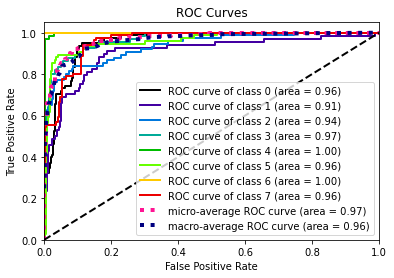

In [248]:
sktplt.metrics.plot_roc(y_test,sv_prb)

# Adaboost Classifier

In [249]:
adbc_prob = adbc.predict_proba(x_test)

In [250]:
roc_auc_score(y_test,adbc_prob,multi_class='ovo',average='weighted')

0.6508116106714237

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

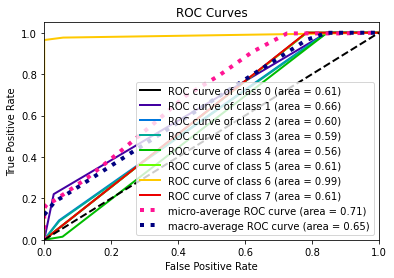

In [251]:
sktplt.metrics.plot_roc(y_test,adbc_prob)

# XGB Classifier

In [252]:
XGBC_prob = XGBC.predict_proba(x_test)

In [253]:
roc_auc_score(y_test,XGBC_prob,multi_class='ovo',average='weighted')

0.9927150931143848

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

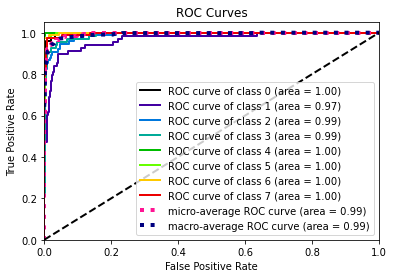

In [254]:
sktplt.metrics.plot_roc(y_test,XGBC_prob)

# Random Forest Classifier

In [255]:
RFC_prob = RFC.predict_proba(x_test)

In [256]:
roc_auc_score(y_test,RFC_prob,multi_class='ovo',average='weighted')

0.9921372364004578

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

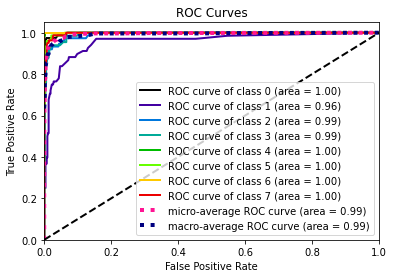

In [257]:
sktplt.metrics.plot_roc(y_test,RFC_prob)

# K Nearest Neighbours Classifier

In [258]:
KNN_prob = KNN.predict_proba(x_test)

In [259]:
roc_auc_score(y_test,KNN_prob,multi_class='ovo',average='weighted')

0.9758137604732836

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

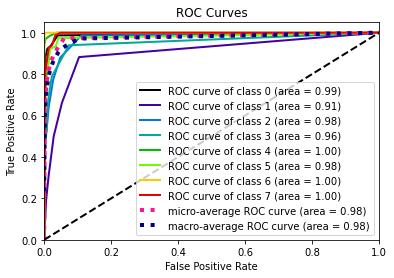

In [260]:
sktplt.metrics.plot_roc(y_test,KNN_prob)

# Based on the above graph and roc_auc_scores,XGB Classifier is the best model for the dataset, and roc_auc_score = 0.9911


# Hyper Parameter Tuning


# Random Forest Classifier

In [261]:
parameter = {'n_estimators':[30,50,60],'max_depth': [10,20,40,60,80],'min_samples_leaf':[5,10,15,20,30],'min_samples_split':[2,5,10,20],'criterion':['gini','entropy'],'max_features':["auto","sqrt","log2"]}

In [262]:
GridCV = GridSearchCV(RandomForestClassifier(),parameter,cv=5,n_jobs = -1,verbose = 1)

In [263]:
GridCV.fit(x_train,y_train)

Fitting 5 folds for each of 1800 candidates, totalling 9000 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 40, 60, 80],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [5, 10, 15, 20, 30],
                         'min_samples_split': [2, 5, 10, 20],
                         'n_estimators': [30, 50, 60]},
             verbose=1)

In [264]:
GridCV.best_params_

{'criterion': 'entropy',
 'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_leaf': 5,
 'min_samples_split': 10,
 'n_estimators': 50}

In [265]:
Best_mod = RandomForestClassifier(n_estimators = 50,criterion = 'entropy', max_depth= 20, max_features = 'log2',min_samples_leaf = 5, min_samples_split = 5)
Best_mod.fit(x_train,y_train)
rfpred = Best_mod.predict(x_test)
acc = accuracy_score(y_test,rfpred)
print(acc*100)

85.23489932885906


# Random Forest Classifier has an accuracy of 85.23%


# XGB Classifier

In [266]:
parameter = {'booster':["gbtree","gblinear"],'eta': [0.01,0.1,0.2,0.3],'min_child_weight':np.arange(5),'max_depth':[10,20,40,60,80],'subsample':[0.5,1]}

In [267]:
GridCV = GridSearchCV(XGBClassifier(),parameter,cv=5,n_jobs = -1,verbose = 1)

In [268]:
GridCV.fit(x_train,y_train)

Fitting 5 folds for each of 400 candidates, totalling 2000 fits
[11:02:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None,

In [269]:
GridCV.best_params_

{'booster': 'gbtree',
 'eta': 0.2,
 'max_depth': 10,
 'min_child_weight': 0,
 'subsample': 0.5}

In [270]:
Best_mod = XGBClassifier(booster = 'gbtree',eta = 0.2, max_depth= 20, min_child_weight = 0,subsample = 0.5)
Best_mod.fit(x_train,y_train)

[11:09:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eta=0.2, gamma=0,
              gpu_id=-1, importance_type='gain', interaction_constraints='',
              learning_rate=0.200000003, max_delta_step=0, max_depth=20,
              min_child_weight=0, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=0.5,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [271]:
xgbpred = Best_mod.predict(x_test)
acc = accuracy_score(y_test,xgbpred)
print(acc*100)

92.11409395973155


In [272]:
conf_matrx = confusion_matrix(y_test,xgbpred)
conf_matrx

array([[74,  2,  0,  0,  0,  0,  0,  2],
       [ 0, 49,  8,  3,  3,  1,  1,  3],
       [ 0,  3, 66,  0,  1,  5,  0,  0],
       [ 0,  4,  1, 59,  0,  1,  0,  1],
       [ 0,  0,  0,  0, 67,  0,  0,  0],
       [ 0,  1,  0,  0,  0, 74,  0,  1],
       [ 0,  2,  0,  0,  0,  0, 83,  0],
       [ 4,  0,  0,  0,  0,  0,  0, 77]], dtype=int64)

# XGB Classifier has an accuracy of 92.11%


# On comparing the accuracies of the 2 models it is determined that XGB classifier is the better model.


# Saving The Model

In [273]:
import joblib
joblib.dump(Best_mod,"BestModelFueltype.pkl")

['BestModelFueltype.pkl']

# Loading The Model

In [274]:
mod=joblib.load("BestModelFueltype.pkl")

In [275]:
print(mod.predict(x_test))

[6 4 1 0 6 6 0 4 6 3 1 0 2 2 0 5 7 5 4 4 0 5 7 6 4 3 0 4 7 4 6 1 0 3 6 0 4
 4 3 1 3 5 5 2 4 7 4 7 0 2 7 4 1 0 3 5 4 6 1 2 2 6 7 5 7 4 4 4 2 0 0 5 2 5
 0 4 6 6 3 2 2 5 3 5 0 6 4 4 6 2 5 5 4 2 6 2 5 6 1 5 4 5 0 5 0 2 1 3 3 2 0
 7 7 7 6 1 5 6 7 7 6 7 7 7 0 5 3 1 5 1 0 6 5 6 1 2 5 1 7 0 1 5 0 5 4 4 7 7
 0 6 0 5 1 7 6 6 7 1 4 4 1 3 0 0 3 5 1 5 5 7 1 6 7 6 4 1 6 0 0 1 4 4 2 3 0
 2 0 2 7 6 1 2 7 4 7 0 5 3 1 0 3 1 4 0 0 4 5 4 2 6 4 7 5 1 0 5 4 2 2 4 2 1
 4 0 5 4 0 6 1 2 3 0 6 1 3 4 0 0 7 7 2 3 3 4 6 3 5 0 3 5 3 0 2 3 5 2 5 0 4
 1 3 7 6 5 6 7 0 6 7 2 7 4 6 5 7 0 4 0 3 4 6 2 3 7 0 4 7 6 0 3 4 1 7 0 5 5
 2 6 4 5 7 2 4 5 4 6 7 2 5 7 4 3 0 6 7 6 4 4 7 0 3 7 7 3 1 6 6 0 2 5 2 5 7
 7 2 2 5 5 3 4 3 2 7 4 5 3 2 6 2 6 2 2 5 5 2 6 3 1 1 0 3 2 7 5 1 7 5 0 1 5
 5 6 1 1 6 4 7 2 5 4 4 2 7 1 1 7 0 6 7 7 7 7 6 6 1 5 0 6 2 0 7 3 1 3 1 0 7
 4 3 5 5 2 4 3 4 6 2 7 3 6 0 2 1 0 5 5 1 0 7 5 0 6 2 3 5 3 7 6 3 4 6 0 3 7
 2 2 4 0 7 6 2 3 7 3 5 0 7 3 3 2 6 1 7 6 7 2 1 7 2 4 6 1 0 6 6 0 5 5 6 4 6
 7 6 1 7 1 2 7 5 3 2 2 5 

In [276]:
Prediction_accuracy = pd.DataFrame({'Predictions': mod.predict(x_test), 'Actual Values': y_test})
Prediction_accuracy.head(50)

,Predictions,Actual Values
0,6,6
1,4,4
2,1,1
3,0,0
4,6,6
5,6,6
6,0,0
7,4,4
8,6,6
9,3,3
